# Thesis

<a id='toc'></a>
### Table of Contents

1. <a href='#dp'>Data Preprocessing</a>
2. <a href='#eda'>Exploratory Data Analysis (EDA)</a>
3. <a href='#fs'>Feature Selection</a>
4. <a href='#ms'>Model Training and Evaluation</a>
5. <a href='#fairness'>Model Fairness</a>
6. <a href='#ifm'>Improving the fairness of our model</a>
7. <a href='#lgbm'>Trying LightGBM Model</a>
8. <a href='#combine'>Combining LightGBM with Random Forest Classifier</a>
9. <a href='#applyfairness'>Applying Fairness to the Final Model</a>
10. <a href='#features'>BAF Dataset Feature Descriptions</a>

<a id='dp'></a>
### 1. Data Preprocessing

In [4]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# define file path for reading the data
file_path = "00_Data/Base.csv"

In [5]:
# Read and convert data to a Data Frame
df = pd.read_csv(file_path)
df.head().T

0            1            2  \
fraud_bool                                   0            0            0   
income                                     0.3          0.8          0.8   
name_email_similarity                 0.986506     0.617426     0.996707   
prev_address_months_count                   -1           -1            9   
current_address_months_count                25           89           14   
customer_age                                40           20           40   
days_since_request                    0.006735     0.010095     0.012316   
intended_balcon_amount              102.453711    -0.849551    -1.490386   
payment_type                                AA           AD           AB   
zip_count_4w                              1059         1658         1095   
velocity_6h                       13096.035018  9223.283431  4471.472149   
velocity_24h                       7850.955007  5745.251481  5471.988958   
velocity_4w                        6742.080561  5941.664859  5992.555113   
bank_branch_count_8w                         5            3           15   
date_of_birth_distinct_emails_4w             5           18           11   
employment_status                           CB           CA           CA   
credit_risk_score                          163          154           89   
email_is_free                                1            1            1   
housing_status                              BC           BC           BC   
phone_home_valid                             0            1            0   
phone_mobile_valid                           1            1            1   
bank_months_count                            9            2           30   
has_other_cards                              0            0            0   
proposed_credit_limit                   1500.0       1500.0        200.0   
foreign_request                              0            0            0   
source                                INTERNET     INTERNET     INTERNET   
session_length_in_minutes            16.224843     3.363854    22.730559   
device_os                                linux        other      windows   
keep_alive_session                           1            1            0   
device_distinct_emails_8w                    1            1            1   
device_fraud_count                           0            0            0   
month                                        0            0            0   

                                             3            4  
fraud_bool                                   0            0  
income                                     0.6          0.9  
name_email_similarity                   0.4751     0.842307  
prev_address_months_count                   11           -1  
current_address_months_count                14           29  
customer_age                                30           40  
days_since_request                    0.006991     5.742626  
intended_balcon_amount               -1.863101    47.152498  
payment_type                                AB           AA  
zip_count_4w                              3483         2339  
velocity_6h                       14431.993621  7601.511579  
velocity_24h                       6755.344479   5124.04693  
velocity_4w                        5970.336831  5940.734212  
bank_branch_count_8w                        11            1  
date_of_birth_distinct_emails_4w            13            6  
employment_status                           CA           CA  
credit_risk_score                           90           91  
email_is_free                                1            0  
housing_status                              BC           BC  
phone_home_valid                             0            1  
phone_mobile_valid                           1            1  
bank_months_count                            1           26  
has_other_cards                              0            0  
proposed_credit_limit                    200.0  

In [6]:
# Checking the shape of the dataframe
df.shape

(1000000, 32)

In [7]:
# Checking if is there any duplicate values
df = df.drop_duplicates()
df.shape

(1000000, 32)

Since the shape of the Data Frame is still same there is not any duplicated rows.

In [9]:
# Obtaining the informations of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [10]:
# Getting the summary statistics
df.describe().T

count         mean          std  \
fraud_bool                        1000000.0     0.011029     0.104438   
income                            1000000.0     0.562696     0.290343   
name_email_similarity             1000000.0     0.493694     0.289125   
prev_address_months_count         1000000.0    16.718568    44.046230   
current_address_months_count      1000000.0    86.587867    88.406599   
customer_age                      1000000.0    33.689080    12.025799   
days_since_request                1000000.0     1.025705     5.381835   
intended_balcon_amount            1000000.0     8.661499    20.236155   
zip_count_4w                      1000000.0  1572.692049  1005.374565   
velocity_6h                       1000000.0  5665.296605  3009.380665   
velocity_24h                      1000000.0  4769.781965  1479.212612   
velocity_4w                       1000000.0  4856.324016   919.843934   
bank_branch_count_8w              1000000.0   184.361849   459.625329   
date_of_birth_distinct_emails_4w  1000000.0     9.503544     5.033792   
credit_risk_score                 1000000.0   130.989595    69.681812   
email_is_free                     1000000.0     0.529886     0.499106   
phone_home_valid                  1000000.0     0.417077     0.493076   
phone_mobile_valid                1000000.0     0.889676     0.313293   
bank_months_count                 1000000.0    10.839303    12.116875   
has_other_cards                   1000000.0     0.222988     0.416251   
proposed_credit_limit             1000000.0   515.851010   487.559902   
foreign_request                   1000000.0     0.025242     0.156859   
session_length_in_minutes         1000000.0     7.544940     8.033106   
keep_alive_session                1000000.0     0.576947     0.494044   
device_distinct_emails_8w         1000000.0     1.018312     0.180761   
device_fraud_count                1000000.0     0.000000     0.000000   
month                             1000000.0     3.288674     2.209994   

                                           min          25%          50%  \
fraud_bool                        0.000000e+00     0.000000     0.000000   
income                            1.000000e-01     0.300000     0.600000   
name_email_similarity             1.434550e-06     0.225216     0.492153   
prev_address_months_count        -1.000000e+00    -1.000000    -1.000000   
current_address_months_count     -1.000000e+00    19.000000    52.000000   
customer_age                      1.000000e+01    20.000000    30.000000   
days_since_request                4.036860e-09     0.007193     0.015176   
intended_balcon_amount           -1.553055e+01    -1.181488    -0.830507   
zip_count_4w                      1.000000e+00   894.000000  1263.000000   
velocity_6h                      -1.706031e+02  3436.365848  5319.769349   
velocity_24h                      1.300307e+03  3593.179135  4749.921161   
velocity_4w                       2.825748e+03  4268.368423  4913.436941   
bank_branch_count_8w              0.000000e+00     1.000000     9.000000   
date_of_birth_distinct_emails_4w  0.000000e+00     6.000000     9.000000   
credit_risk_score                -1.700000e+02    83.000000   122.000000   
email_is_free                     0.000000e+00     0.000000     1.000000   
phone_home_valid                  0.000000e+00     0.000000     0.000000   
phone_mobile_valid                0.000000e+00     1.000000     1.000000   
bank_months_count                -1.000000e+00    -1.000000     5.000000   
has_other_cards                   0.000000e+00     0.000000     0.000000   
proposed_credit_limit             1.900000e+02   200.000000   200.000000   
foreign_request                   0.000000e+00     0.000000     0.000000   
session_length_in_minutes        -1.000000e+00     3.103053     5.114321   
keep_alive_session                0.000000e+00     0.000000     1.000000   
device_distinct_emails_8w        -1.000000e+00     1.000000     1.000000   
device_fraud_coun

In [11]:
df.device_fraud_count.value_counts()

device_fraud_count
0    1000000
Name: count, dtype: int64

The `device_fraud_count` column contains a single unique value (0) across all 1,000,000 observations, indicating no variability. This lack of informational value means it cannot aid in distinguishing between classes or in predictive modeling. Retaining such a feature would introduce unnecessary complexity without benefit, making it prudent to remove this column to streamline the dataset and enhance data processing efficiency.

In [13]:
# Drop device_fraud_count column
df.drop(columns=['device_fraud_count'], inplace=True)
df.shape

(1000000, 31)

In [14]:
# Getting the summary statistics for object type
df.describe(include=[object]).T

count unique       top    freq
payment_type       1000000      5        AB  370554
employment_status  1000000      7        CA  730252
housing_status     1000000      7        BC  372143
source             1000000      2  INTERNET  992952
device_os          1000000      5     other  342728

#### Handling Missing Values
In the context of banking data analysis aimed at detecting fraudulent behavior, it is critical to handle missing values in a logical manner. For this study, missing values represented by '-1' are replaced with '0'. This approach is grounded in the hypothesis that the absence of information could be indicative of potential fraud. By categorizing these entries as having no previous information, we aim to identify patterns that could be associated with fraudulent activities.  

Replacing missing values with '0' in these columns is logical. For instance, if the previous address duration is not known, it is better to label it as 0 months, indicating no previous address information. This method allows for a consistent and meaningful interpretation of missing data, aligning with our objective to uncover potential fraud patterns.

In [16]:
# Handling Missing Values
columns_with_missing_values = [
    'prev_address_months_count',
    'current_address_months_count', 
    'bank_months_count',
    'session_length_in_minutes',
    'device_distinct_emails_8w', 
]

for col in columns_with_missing_values:
    df[col] = df[col].replace(-1, 0)

In [17]:
# Getting the summary statistics
df.describe().T

count         mean          std  \
fraud_bool                        1000000.0     0.011029     0.104438   
income                            1000000.0     0.562696     0.290343   
name_email_similarity             1000000.0     0.493694     0.289125   
prev_address_months_count         1000000.0    17.431488    43.760841   
current_address_months_count      1000000.0    86.592121    88.402408   
customer_age                      1000000.0    33.689080    12.025799   
days_since_request                1000000.0     1.025705     5.381835   
intended_balcon_amount            1000000.0     8.661499    20.236155   
zip_count_4w                      1000000.0  1572.692049  1005.374565   
velocity_6h                       1000000.0  5665.296605  3009.380665   
velocity_24h                      1000000.0  4769.781965  1479.212612   
velocity_4w                       1000000.0  4856.324016   919.843934   
bank_branch_count_8w              1000000.0   184.361849   459.625329   
date_of_birth_distinct_emails_4w  1000000.0     9.503544     5.033792   
credit_risk_score                 1000000.0   130.989595    69.681812   
email_is_free                     1000000.0     0.529886     0.499106   
phone_home_valid                  1000000.0     0.417077     0.493076   
phone_mobile_valid                1000000.0     0.889676     0.313293   
bank_months_count                 1000000.0    11.092938    11.874436   
has_other_cards                   1000000.0     0.222988     0.416251   
proposed_credit_limit             1000000.0   515.851010   487.559902   
foreign_request                   1000000.0     0.025242     0.156859   
session_length_in_minutes         1000000.0     7.546955     8.031088   
keep_alive_session                1000000.0     0.576947     0.494044   
device_distinct_emails_8w         1000000.0     1.018671     0.177720   
month                             1000000.0     3.288674     2.209994   

                                           min          25%          50%  \
fraud_bool                        0.000000e+00     0.000000     0.000000   
income                            1.000000e-01     0.300000     0.600000   
name_email_similarity             1.434550e-06     0.225216     0.492153   
prev_address_months_count         0.000000e+00     0.000000     0.000000   
current_address_months_count      0.000000e+00    19.000000    52.000000   
customer_age                      1.000000e+01    20.000000    30.000000   
days_since_request                4.036860e-09     0.007193     0.015176   
intended_balcon_amount           -1.553055e+01    -1.181488    -0.830507   
zip_count_4w                      1.000000e+00   894.000000  1263.000000   
velocity_6h                      -1.706031e+02  3436.365848  5319.769349   
velocity_24h                      1.300307e+03  3593.179135  4749.921161   
velocity_4w                       2.825748e+03  4268.368423  4913.436941   
bank_branch_count_8w              0.000000e+00     1.000000     9.000000   
date_of_birth_distinct_emails_4w  0.000000e+00     6.000000     9.000000   
credit_risk_score                -1.700000e+02    83.000000   122.000000   
email_is_free                     0.000000e+00     0.000000     1.000000   
phone_home_valid                  0.000000e+00     0.000000     0.000000   
phone_mobile_valid                0.000000e+00     1.000000     1.000000   
bank_months_count                 0.000000e+00     0.000000     5.000000   
has_other_cards                   0.000000e+00     0.000000     0.000000   
proposed_credit_limit             1.900000e+02   200.000000   200.000000   
foreign_request                   0.000000e+00     0.000000     0.000000   
session_length_in_minutes         0.000000e+00     3.103053     5.114321   
keep_alive_session                0.000000e+00     0.000000     1.000000   
device_distinct_emails_8w         0.000000e+00     1.000000     1.000000   
month                             0.000000e+00     1.000000     3.000000   

             

----
<a href='#toc'>Back to ToC</a>

<a id='eda'></a>
### 2. Exploratory Data Analysis (EDA)

In [21]:
# An empty list to store individual DataFrames
df_obj = []

# Loop through each object column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':
        # Get value counts and normalized value counts
        value_counts = df[col].value_counts()
        normalized_counts = df[col].value_counts(normalize=True)
        
        # Calculate fraud rates for each category
        fraud_rate = df.groupby(col)['fraud_bool'].mean() * 100
        
        # Combine them into a DataFrame
        col_df = pd.DataFrame({
            'Category': value_counts.index,
            'Count': value_counts.values,
            'Proportion': normalized_counts.values,
            'Fraud Rate (%)': fraud_rate.values,
            'Column Name': col
        })
        
        # Append to the list
        df_obj.append(col_df)

# Concatenate all DataFrames in the list
df_vc = pd.concat(df_obj, axis=0)

# Reset the index
df_vc.reset_index(drop=True, inplace=True)

# Display the DataFrame
df_vc

Category   Count  Proportion  Fraud Rate (%)        Column Name
0          AB  370554    0.370554        0.528172       payment_type
1          AA  258249    0.258249        1.125072       payment_type
2          AC  252071    0.252071        1.669768       payment_type
3          AD  118837    0.118837        1.082155       payment_type
4          AE     289    0.000289        0.346021       payment_type
5          CA  730252    0.730252        1.218620  employment_status
6          CB  138288    0.138288        0.689142  employment_status
7          CF   44034    0.044034        2.468351  employment_status
8          CC   37758    0.037758        0.377045  employment_status
9          CD   26522    0.026522        0.233552  employment_status
10         CE   22693    0.022693        0.193033  employment_status
11         CG     453    0.000453        1.545254  employment_status
12         BC  372143    0.372143        3.746574     housing_status
13         BB  260965    0.260965        0.600847     housing_status
14         BA  169675    0.169675        0.614817     housing_status
15         BE  169135    0.169135        0.863881     housing_status
16         BD   26161    0.026161        0.344104     housing_status
17         BF    1669    0.001669        0.419413     housing_status
18         BG     252    0.000252        0.396825     housing_status
19   INTERNET  992952    0.992952        1.099449             source
20    TELEAPP    7048    0.007048        1.589103             source
21      other  342728    0.342728        0.515461          device_os
22      linux  332712    0.332712        1.397094          device_os
23    windows  263506    0.263506        0.575967          device_os
24  macintosh   53826    0.053826        2.469393          device_os
25        x11    7228    0.007228        1.120642          device_os

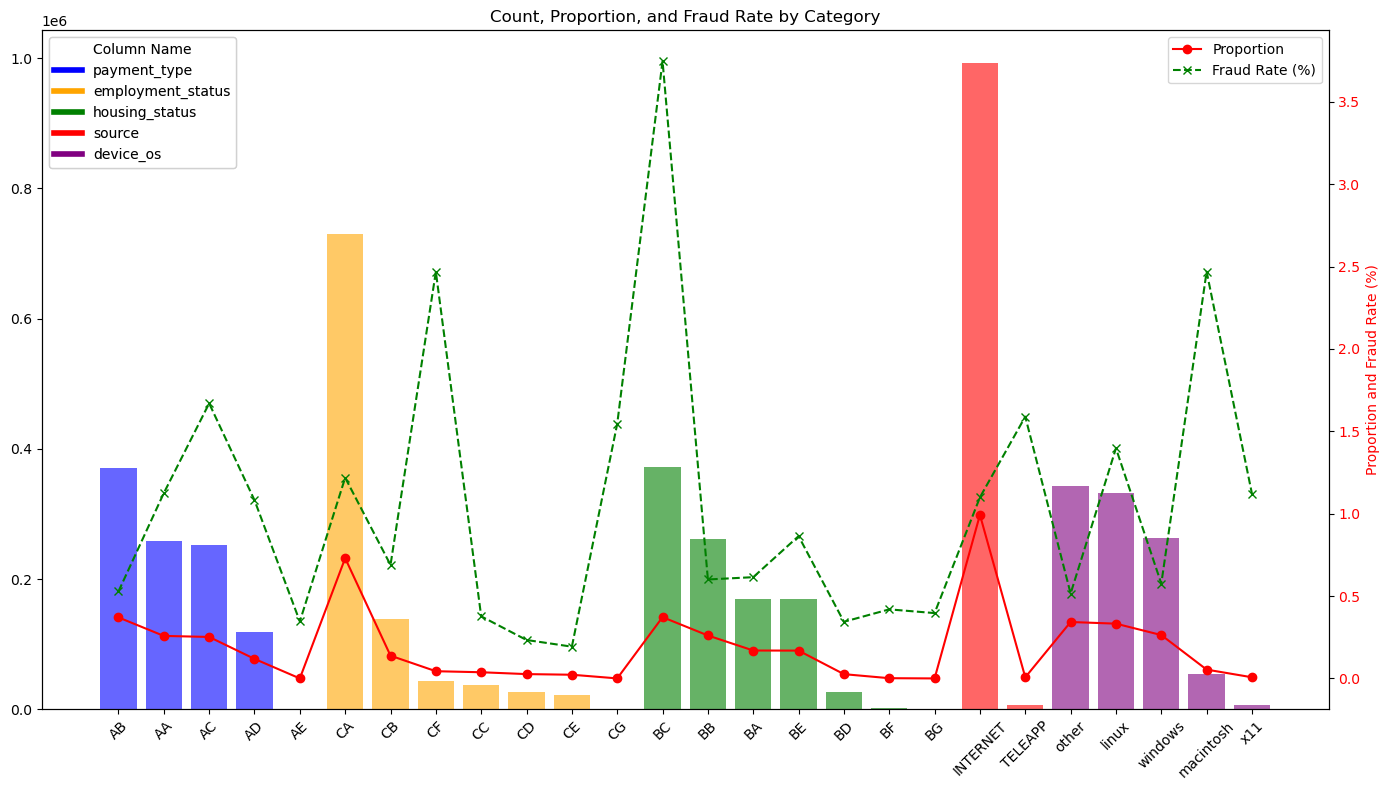

In [22]:
# Assign colors based on Column Name
colors = {
    "payment_type": "blue",
    "employment_status": "orange",
    "housing_status": "green",
    "source": "red",
    "device_os": "purple"
}

# Apply colors to each bar
bar_colors = df_vc['Column Name'].map(colors)

# Plotting with colored bars, x-ticks at 45 degrees, and custom legend
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Count with corresponding colors
bars = ax1.bar(df_vc['Category'], df_vc['Count'], color=bar_colors, alpha=0.6)

# Create a legend for the bar colors
legend_labels = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
legend_colors = [colors[label] for label in legend_labels]
legend_patches = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]

# Adding bar color legend
first_legend = ax1.legend(legend_patches, legend_labels, title='Column Name', loc='upper left')

# Rotate x-ticks
plt.xticks(rotation=45)

# Create a second y-axis to plot Proportion and Fraud Rate
ax2 = ax1.twinx()
ax2.plot(df_vc['Category'], df_vc['Proportion'], color='r', marker='o', linestyle='-', label='Proportion')
ax2.plot(df_vc['Category'], df_vc['Fraud Rate (%)'], color='g', marker='x', linestyle='--', label='Fraud Rate (%)')
ax2.set_ylabel('Proportion and Fraud Rate (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding title and legend for lines
plt.title('Count, Proportion, and Fraud Rate by Category')
fig.tight_layout()
lines_legend = ax2.legend(loc='upper right')
ax1.add_artist(first_legend)

plt.show()

### Analysis of Count, Proportion, and Fraud Rate by Category and Column Name

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the count (bars), proportion (red line), and fraud rate (green dashed line) for different categories within several columns: `payment_type`, `employment_status`, `housing_status`, `source`, and `device_os`.
   - Each bar color represents a different column name.

2. **Category Analysis:**
   - **Counts:**
     - The bars represent the count of occurrences for each category within the respective columns.
     - Categories with the highest counts include various categories across `payment_type`, `employment_status`, `housing_status`, `source`, and `device_os`.
   - **Proportions:**
     - The red line represents the proportion of occurrences for each category relative to the total.
     - Categories such as `INTERNET` (from `source`), `CA` (from `housing_status`), and others have high proportions, indicating they constitute a significant portion of the data.
   - **Fraud Rates:**
     - The green dashed line with 'x' markers represents the fraud rate for each category.
     - Categories such as `BC` (from `payment_type`), `macintosh` (from `device_os`), and others have higher fraud rates, indicating a higher likelihood of fraudulent transactions within these categories.

3. **Implications:**
   - **High Count and Proportion Categories:**
     - Categories with high counts and proportions dominate the dataset. These categories should be carefully analyzed to understand their impact on the overall fraud rates.
   - **High Fraud Rate Categories:**
     - Categories with high fraud rates are critical. These indicate where fraud is more likely to occur, suggesting the need for targeted fraud prevention measures.

In [24]:
df.fraud_bool.value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

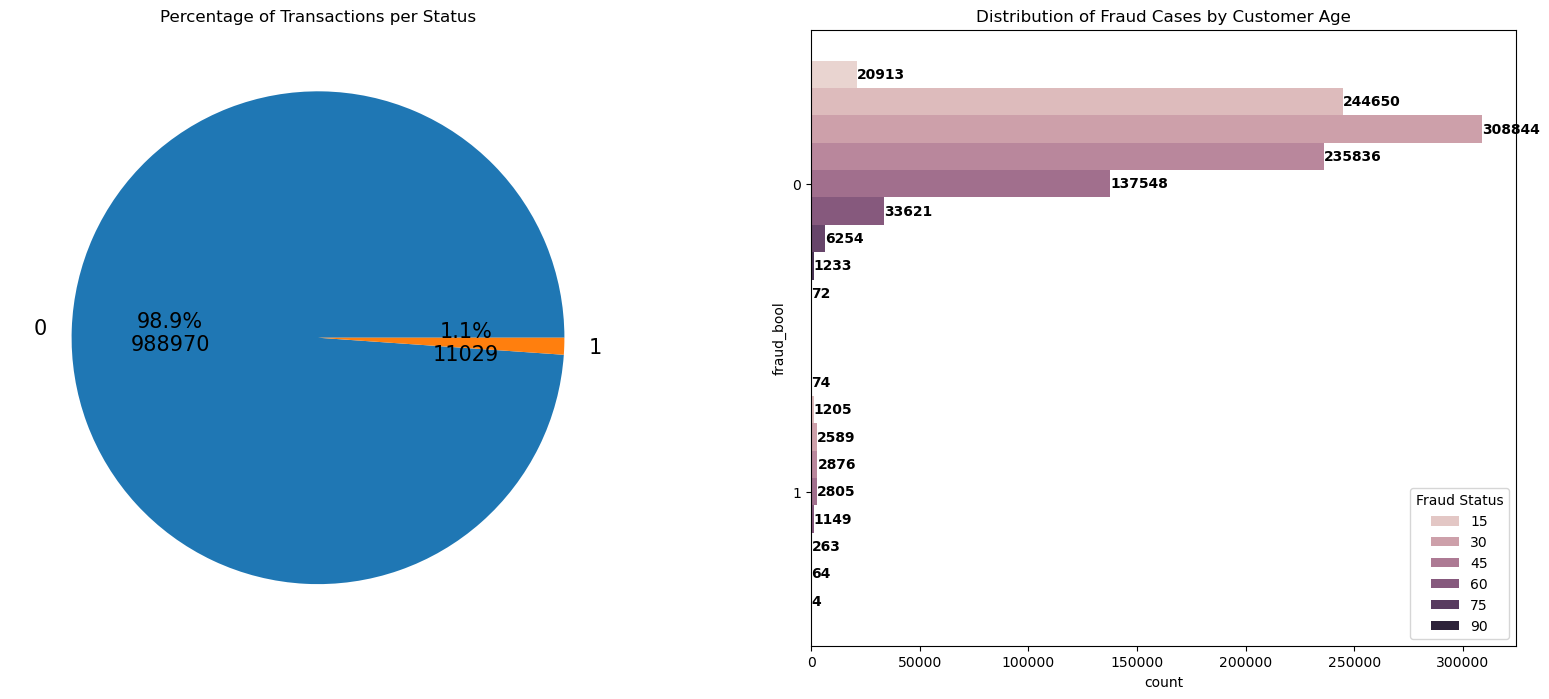

In [25]:
values= list(df["fraud_bool"].value_counts())
def pie_values(pct, values):
    value = int(pct/100.*np.sum(values))
    return "{:.1f}%\n{:d}".format(pct, value)

plt.figure(figsize=(20, 8))
plt.subplot(121)
df["fraud_bool"].value_counts().plot.pie(autopct=lambda pct: pie_values(pct, values),
                                           title="Percentage of Transactions per Status",
                                           textprops={'fontsize': 15})

plt.ylabel("")
plt.subplot(122)
ax = sns.countplot(y="fraud_bool", hue="customer_age", data=df)
plt.title("Distribution of Fraud Cases by Customer Age")
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Only annotate bars with positive width
        ax.annotate(int(width), (width + 2, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, fontweight='bold')

plt.legend(title="Fraud Status", loc='lower right') 
plt.show()

### Analysis of Fraud Status and Distribution of Fraud Cases by Customer Age

#### Interpretation of the Plot:

1. **Overview:**
   - The left pie chart shows the percentage of transactions per status (fraudulent vs. non-fraudulent).
   - The right bar plot shows the distribution of fraud cases by customer age.

2. **Percentage of Transactions per Status:**
   - **Non-Fraudulent Transactions (0):** 
     - Represent 98.9% of the total transactions.
     - Total count: 988,970 transactions.
   - **Fraudulent Transactions (1):**
     - Represent 1.1% of the total transactions.
     - Total count: 11,029 transactions.
   - **Implications:** 
     - The dataset is highly imbalanced, with a significantly higher number of non-fraudulent transactions compared to fraudulent ones.

3. **Distribution of Fraud Cases by Customer Age:**
   - **Ages 30-40:** 
     - Highest count of fraud cases at 30,844.
   - **Ages 40-50:** 
     - Next highest count of fraud cases at 24,465.
   - **Ages 20-30:** 
     - Fraud cases at 23,583.
   - **Ages 50-60:** 
     - Fraud cases at 13,754.
   - **Ages 60-70:** 
     - Fraud cases at 3,362.
   - **Ages 10-20:** 
     - Fraud cases at 2,091.
   - **Ages 70-80:** 
     - Fraud cases at 1,233.
   - **Ages 80-90:** 
     - Fraud cases at 72.
   - **Ages 90-100:** 
     - Fraud cases at 4.
   - **Implications:** 
     - Fraud cases are most prevalent among customers aged 30-50. This suggests that individuals within this age range are more likely to be targeted or involved in fraudulent activities.
     - There is a noticeable decline in fraud cases for customers aged above 60, with very few cases in the 80-100 age range.

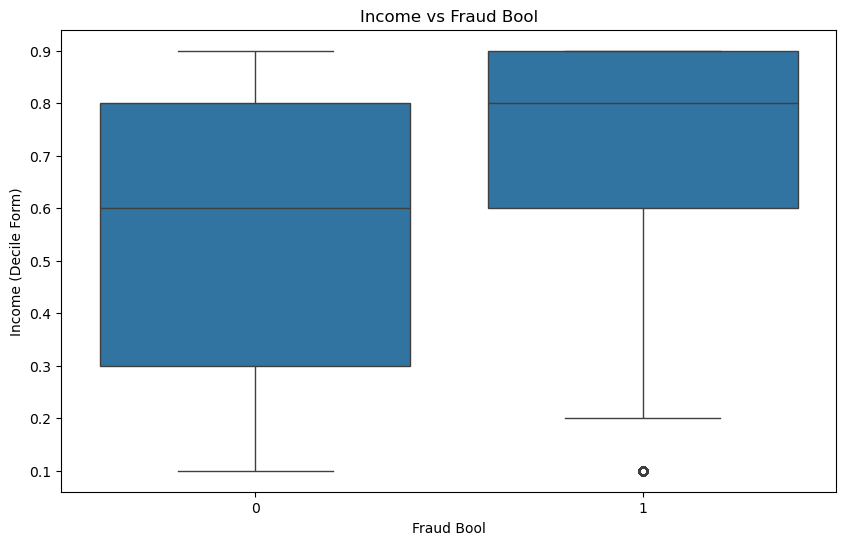

In [27]:
# Boxplot of income vs fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fraud_bool'], y=df['income'])
plt.title('Income vs Fraud Bool')
plt.xlabel('Fraud Bool')
plt.ylabel('Income (Decile Form)')
plt.show()

### Analysis of Income vs Fraud Bool

#### Interpretation of the Plot:

1. **Overview:**
   - The box plot shows the distribution of income (in decile form) for non-fraudulent (0) and fraudulent (1) transactions.

2. **Income Distribution for Fraud Bool:**
   - **Non-Fraudulent Transactions (0):**
     - Median income: Approximately 0.60 (decile form).
     - Interquartile Range (IQR): Approximately 0.40 to 0.80.
     - Range: 0.10 to 0.90.
   - **Fraudulent Transactions (1):**
     - Median income: Approximately 0.80 (decile form).
     - Interquartile Range (IQR): Approximately 0.70 to 0.85.
     - Range: 0.30 to 0.90.
     - A few outliers below 0.30.

3. **Implications:**
   - **Higher Income Correlation with Fraud:** The median income for fraudulent transactions is higher compared to non-fraudulent transactions. This suggests that higher income levels are more associated with fraudulent activities.
   - **Less Variability in Fraudulent Income:** The interquartile range for fraudulent transactions is narrower compared to non-fraudulent transactions, indicating less variability in income among the fraudulent cases.

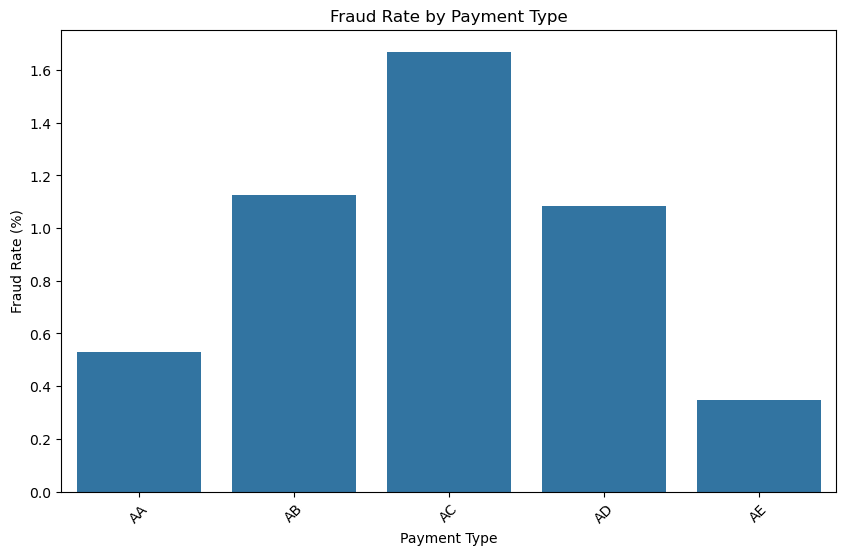

In [29]:
# Calculate the rate of fraudulent transactions for each payment type
payment_type_fraud_rate = df.groupby('payment_type')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each payment type
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_fraud_rate.index, y=payment_type_fraud_rate.values)
plt.title('Fraud Rate by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Analysis of Fraud Rate by Payment Type

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each payment type.

2. **Payment Type Fraud Rates:**
   - **AC:** Highest fraud rate at approximately 1.6%.
   - **AB:** Next highest fraud rate at around 1.2%.
   - **AD:** Fraud rate close to 1.0%.
   - **AE:** Lowest fraud rate at around 0.4%.
   - **AA:** Fraud rate slightly above 0.5%.

3. **Implications:**
   - **AC has the highest fraud rate:** This indicates that transactions made using the payment type `AC` are more susceptible to fraud compared to other payment types. This could warrant further investigation into why this payment type is more prone to fraud.
   - **AE has the lowest fraud rate:** The payment type `AE` has the lowest fraud rate, suggesting it might be the most secure or least targeted by fraudulent activities.

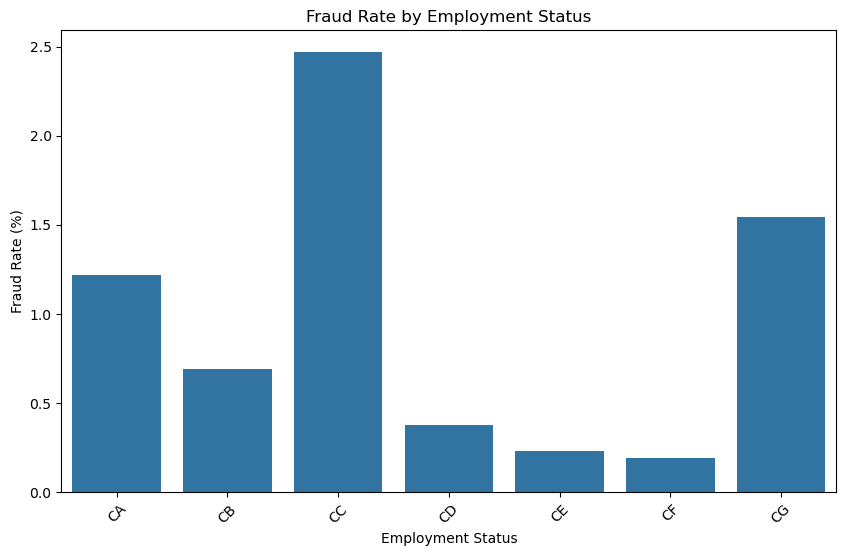

In [31]:
# Calculate the rate of fraudulent transactions for each employment status
employment_status_fraud_rate = df.groupby('employment_status')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each employment status
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_status_fraud_rate.index, y=employment_status_fraud_rate.values)
plt.title('Fraud Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Analysis of Fraud Rate by Employment Status

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each employment status.

2. **Employment Status Fraud Rates:**
   - **CC:** Highest fraud rate at approximately 2.5%.
   - **CG:** Next highest fraud rate at around 1.5%.
   - **CA:** Third highest fraud rate.

3. **Implications:**
   - **CC has the highest fraud rate:** This indicates that individuals with the employment status `CC` are more susceptible to fraud compared to other employment statuses. This could warrant further investigation into why this employment status is more prone to fraud.
   - **CG also shows a high fraud rate:** Similar attention should be given to individuals with the employment status `CG`.

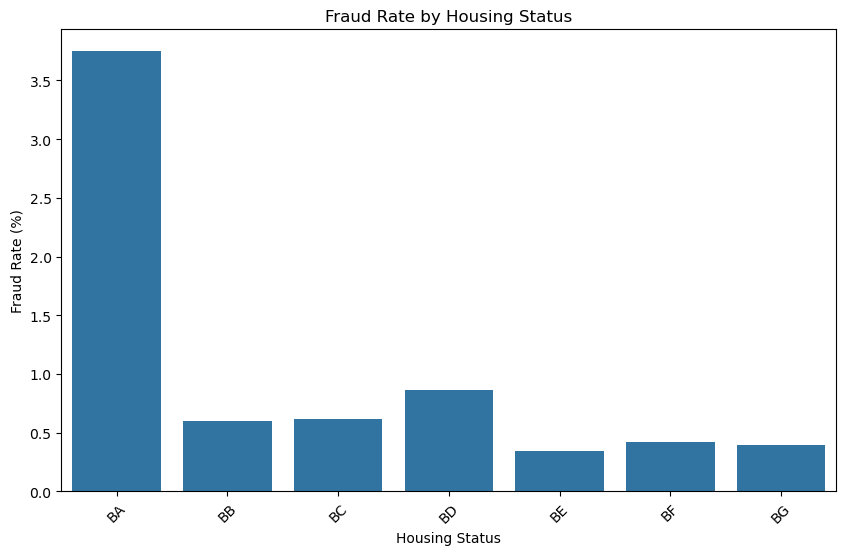

In [33]:
# Calculate the rate of fraudulent transactions for each housing status
housing_status_fraud_rate = df.groupby('housing_status')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each housing status
plt.figure(figsize=(10, 6))
sns.barplot(x=housing_status_fraud_rate.index, y=housing_status_fraud_rate.values)
plt.title('Fraud Rate by Housing Status')
plt.xlabel('Housing Status')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Analysis of Fraud Rate by Housing Status

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each housing status.

2. **Housing Status Fraud Rates:**
   - **BA:** Highest fraud rate at approximately 3.5%.
   - **BD:** Next highest fraud rate at around 1.0%.
   - **BE, BF, BG:** Fraud rates close to 0.5%.
   - **BB, BC:** Fraud rates around 0.8%.
   - **BH:** Fraud rate below 0.5%, but slightly higher than BE, BF, and BG.

3. **Implications:**
   - **BA has the highest fraud rate:** This indicates that individuals with the housing status `BA` are significantly more susceptible to fraud compared to other housing statuses. This could warrant further investigation into why this housing status is more prone to fraud.
   - **BD shows a moderate fraud rate:** While not as high as `BA`, individuals with the housing status `BD` also have a relatively higher fraud rate compared to others.

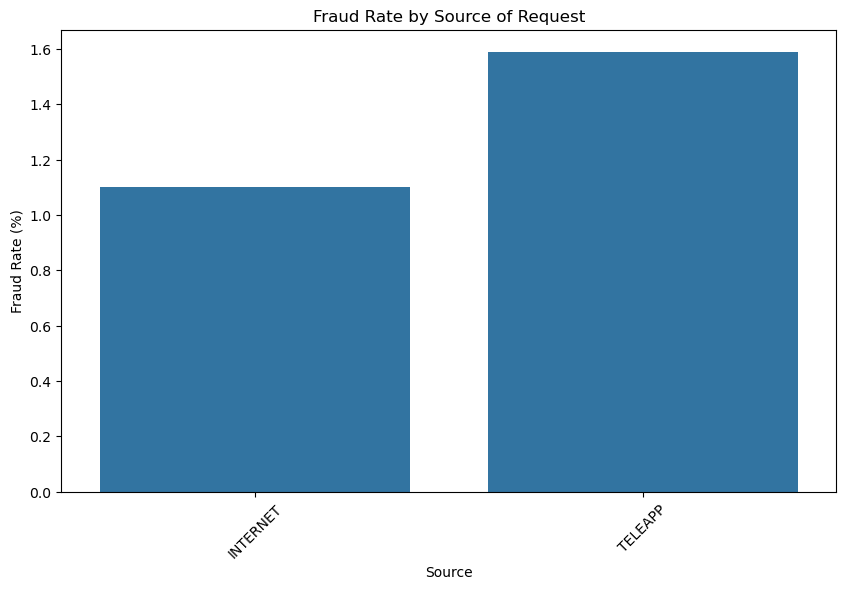

In [35]:
# Calculate the rate of fraudulent transactions for each source
source_fraud_rate = df.groupby('source')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each source
plt.figure(figsize=(10, 6))
sns.barplot(x=source_fraud_rate.index, y=source_fraud_rate.values)
plt.title('Fraud Rate by Source of Request')
plt.xlabel('Source')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()


### Analysis of Fraud Rate by Source of Request

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each source of request.

2. **Source of Request Fraud Rates:**
   - **TELEAPP:** Highest fraud rate at approximately 1.6%.
   - **INTERNET:** Lower fraud rate at around 1.2%.

3. **Implications:**
   - **TELEAPP has a higher fraud rate:** This indicates that requests coming from the source `TELEAPP` are more susceptible to fraud compared to those from `INTERNET`. This could warrant further investigation into why this source is more prone to fraud.
   - **INTERNET shows a lower fraud rate:** While still significant, the fraud rate for requests coming from the `INTERNET` source is lower compared to `TELEAPP`.

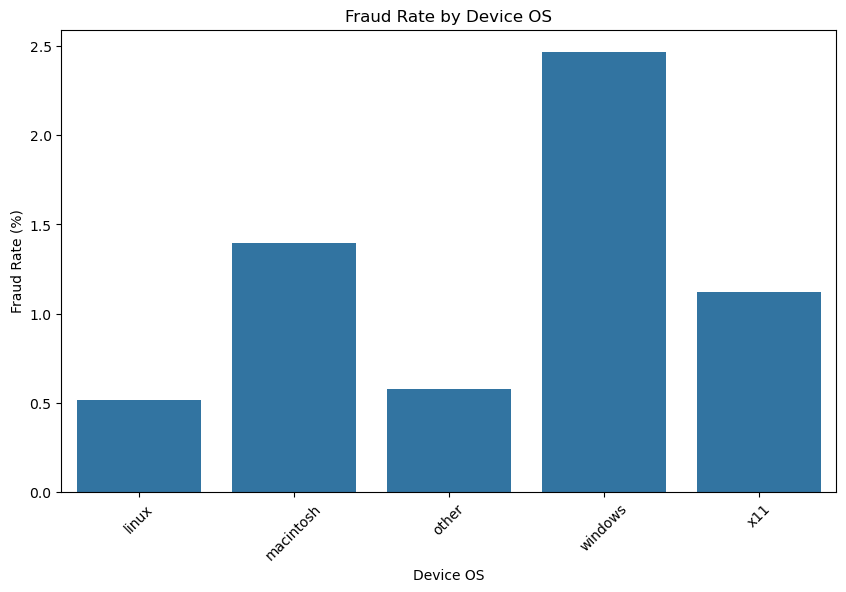

In [37]:
# Calculate the rate of fraudulent transactions for each device OS
device_os_fraud_rate = df.groupby('device_os')['fraud_bool'].mean() * 100

# Plot the fraudulent rate for each device OS
plt.figure(figsize=(10, 6))
sns.barplot(x=device_os_fraud_rate.index, y=device_os_fraud_rate.values)
plt.title('Fraud Rate by Device OS')
plt.xlabel('Device OS')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Analysis of Fraud Rate by Device OS

#### Interpretation of the Plot:

1. **Overview:**
   - The plot shows the fraud rate (in percentage) for each device operating system (OS).

2. **Device OS Fraud Rates:**
   - **Windows:** Highest fraud rate at approximately 2.5%.
   - **Macintosh:** Next highest fraud rate at around 1.5%.
   - **iOS:** Fraud rate close to 1.0%.
   - **Other:** Fraud rate around 0.7%.
   - **Linux:** Lowest fraud rate at around 0.5%.

3. **Implications:**
   - **Windows has the highest fraud rate:** This indicates that devices running the Windows operating system are more susceptible to fraud compared to other operating systems. This could warrant further investigation into why this OS is more prone to fraud.
   - **Macintosh also shows a relatively high fraud rate:** Similar attention should be given to devices running the Macintosh operating system.

----
<a href='#toc'>Back to ToC</a>

<a id='fs'></a>
### 3. Feature Selection

In [41]:
df.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                          0   
1           0     0.8               0.617426                          0   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                          0   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w   velocity_6h  \
0              102.453711           AA          1059  13096.035018   
1               -0.849551           AD          1658   9223.283431   
2               -1.490386           AB          1095   4471.472149   
3               -1.863101           AB          3483  14431.993621   
4               47.152498           AA          2339   7601.511579   

   velocity_24h  velocity_4w  bank_branch_count_8w  \
0   7850.955007  6742.080561                     5   
1   5745.251481  5941.664859                     3   
2   5471.988958  5992.555113                    15   
3   6755.344479  5970.336831                    11   
4   5124.046930  5940.734212                     1   

   date_of_birth_distinct_emails_4w employment_status  credit_risk_score  \
0                                 5                CB                163   
1                                18                CA                154   
2                                11                CA                 89   
3                                13                CA                 90   
4                                 6                CA                 91   

   email_is_free housing_status  phone_home_valid  phone_mobile_valid  \
0              1             BC                 0                   1   
1              1             BC                 1                   1   
2              1             BC                 0                   1   
3              1             BC                 0                   1   
4              0             BC                 1                   1   

   bank_months_count  has_other_cards  proposed_credit_limit  foreign_request  \
0                  9                0                 1500.0                0   
1                  2                0                 1500.0                0   
2                 30                0                  200.0                0   
3                  1                0                  200.0                0   
4                 26                0                  200.0                0   

     source  session_length_in_minutes device_os  keep_alive_session  \
0  INTERNET                  16.224843     linux                   1   
1  INTERNET                   3.363854     other                   1   
2  INTERNET                  22.730559   windows                   0   
3  INTERNET                  15.215816     linux                   1   
4  INTERNET                   3.743048     other                   0   

   device_distinct_emails_8w  month  
0                          1      0  
1                          1      0  
2                          1      0  
3                          1      0  
4                          1      0

In [42]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

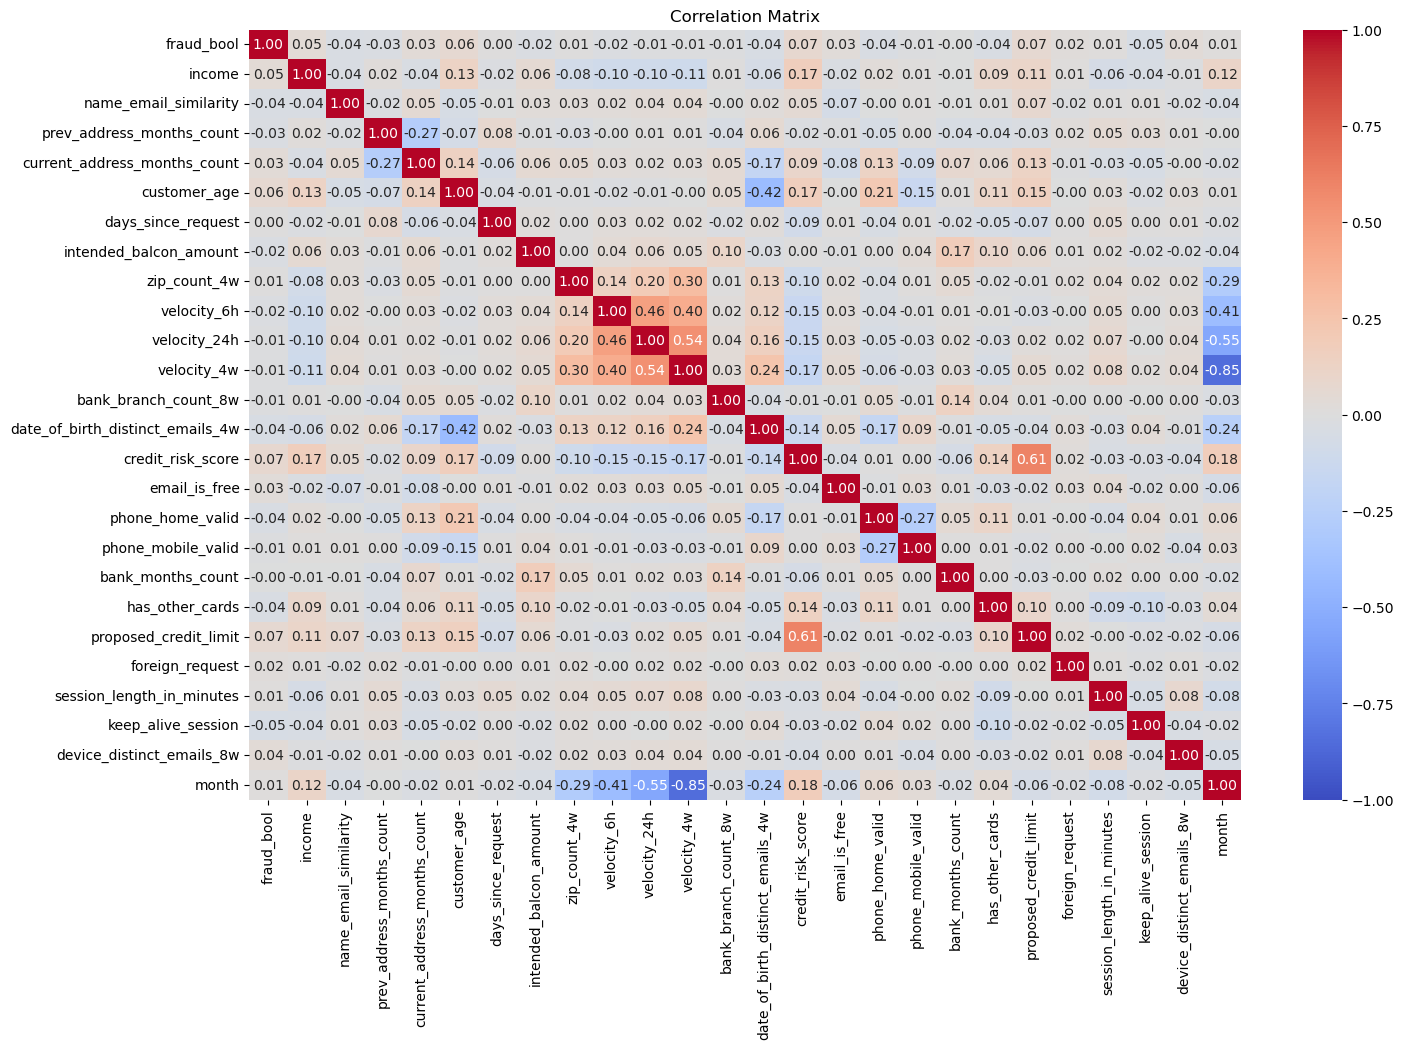

In [43]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Analysis of Correlation Matrix
1. **Strong Positive Correlations:**
 - **date_of_birth_distinct_emails_4w** and **device_distinct_emails_8w:** Correlation coefficient of 0.61, indicating a strong direct relationship.
 - **employment_status and customer_age:** Correlation coefficient of 0.54, indicating a strong direct relationship.    
  
2. **Strong Negative Correlations:**
 - **credit_risk_score and customer_age:** Correlation coefficient of -0.85, indicating a strong inverse relationship.
 - **velocity_24h and name_email_similarity:** Correlation coefficient of -0.55, indicating a strong inverse relationship.
 - **velocity_4w and name_email_similarity:** Correlation coefficient of -0.41, indicating a strong inverse relationship.

### Categorical and Numerical Feature selection  
#### Categorical Features:  
**payment_type:** Categorical-Nominal (needs one-hot encoding)  
**employment_status:** Categorical-Nominal (needs one-hot encoding)  
**housing_status:** Categorical-Nominal (needs one-hot encoding)  
**source:** Categorical-Nominal (needs one-hot encoding)  
**device_os:** Nominal (needs one-hot encoding)  

#### Numerical Features (already in numeric form, no encoding needed):  
**income:** Numeric    
**name_email_similarity:** Numeric  
**prev_address_months_count:** Numeric 
**current_address_months_count:** Numeric  
**customer_age:** Numeric  
**days_since_request:** Numeric 
**intended_balcon_amount:** Numeric  
**zip_count_4w:** Numeric  
**velocity_6h:** Numeric  
**velocity_24h:** Numeric  
**velocity_4w:** Numeric  
**bank_branch_count_8w:** Numeric        
**date_of_birth_distinct_emails_4w:** Numeric    
**credit_risk_score:** Numeric   
**email_is_free:** Binary   
**phone_home_valid:** Binary   
**phone_mobile_valid:** Binary   
**bank_months_count:** Numeric   
**has_other_cards:** Binary   
**proposed_credit_limit:** Numeric   
**foreign_request:** Binary   
**session_length_in_minutes:** Numeric  
**keep_alive_session:** Binary  
**device_distinct_emails_8w:** Numeric  
**month:** Nominal  
**fraud_bool:** Binary (target variable)

In [46]:
# Identify categorical columns for one-hot encoding
categorical_columns = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [47]:
# Apply one-hot encoding to binary and nominal columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

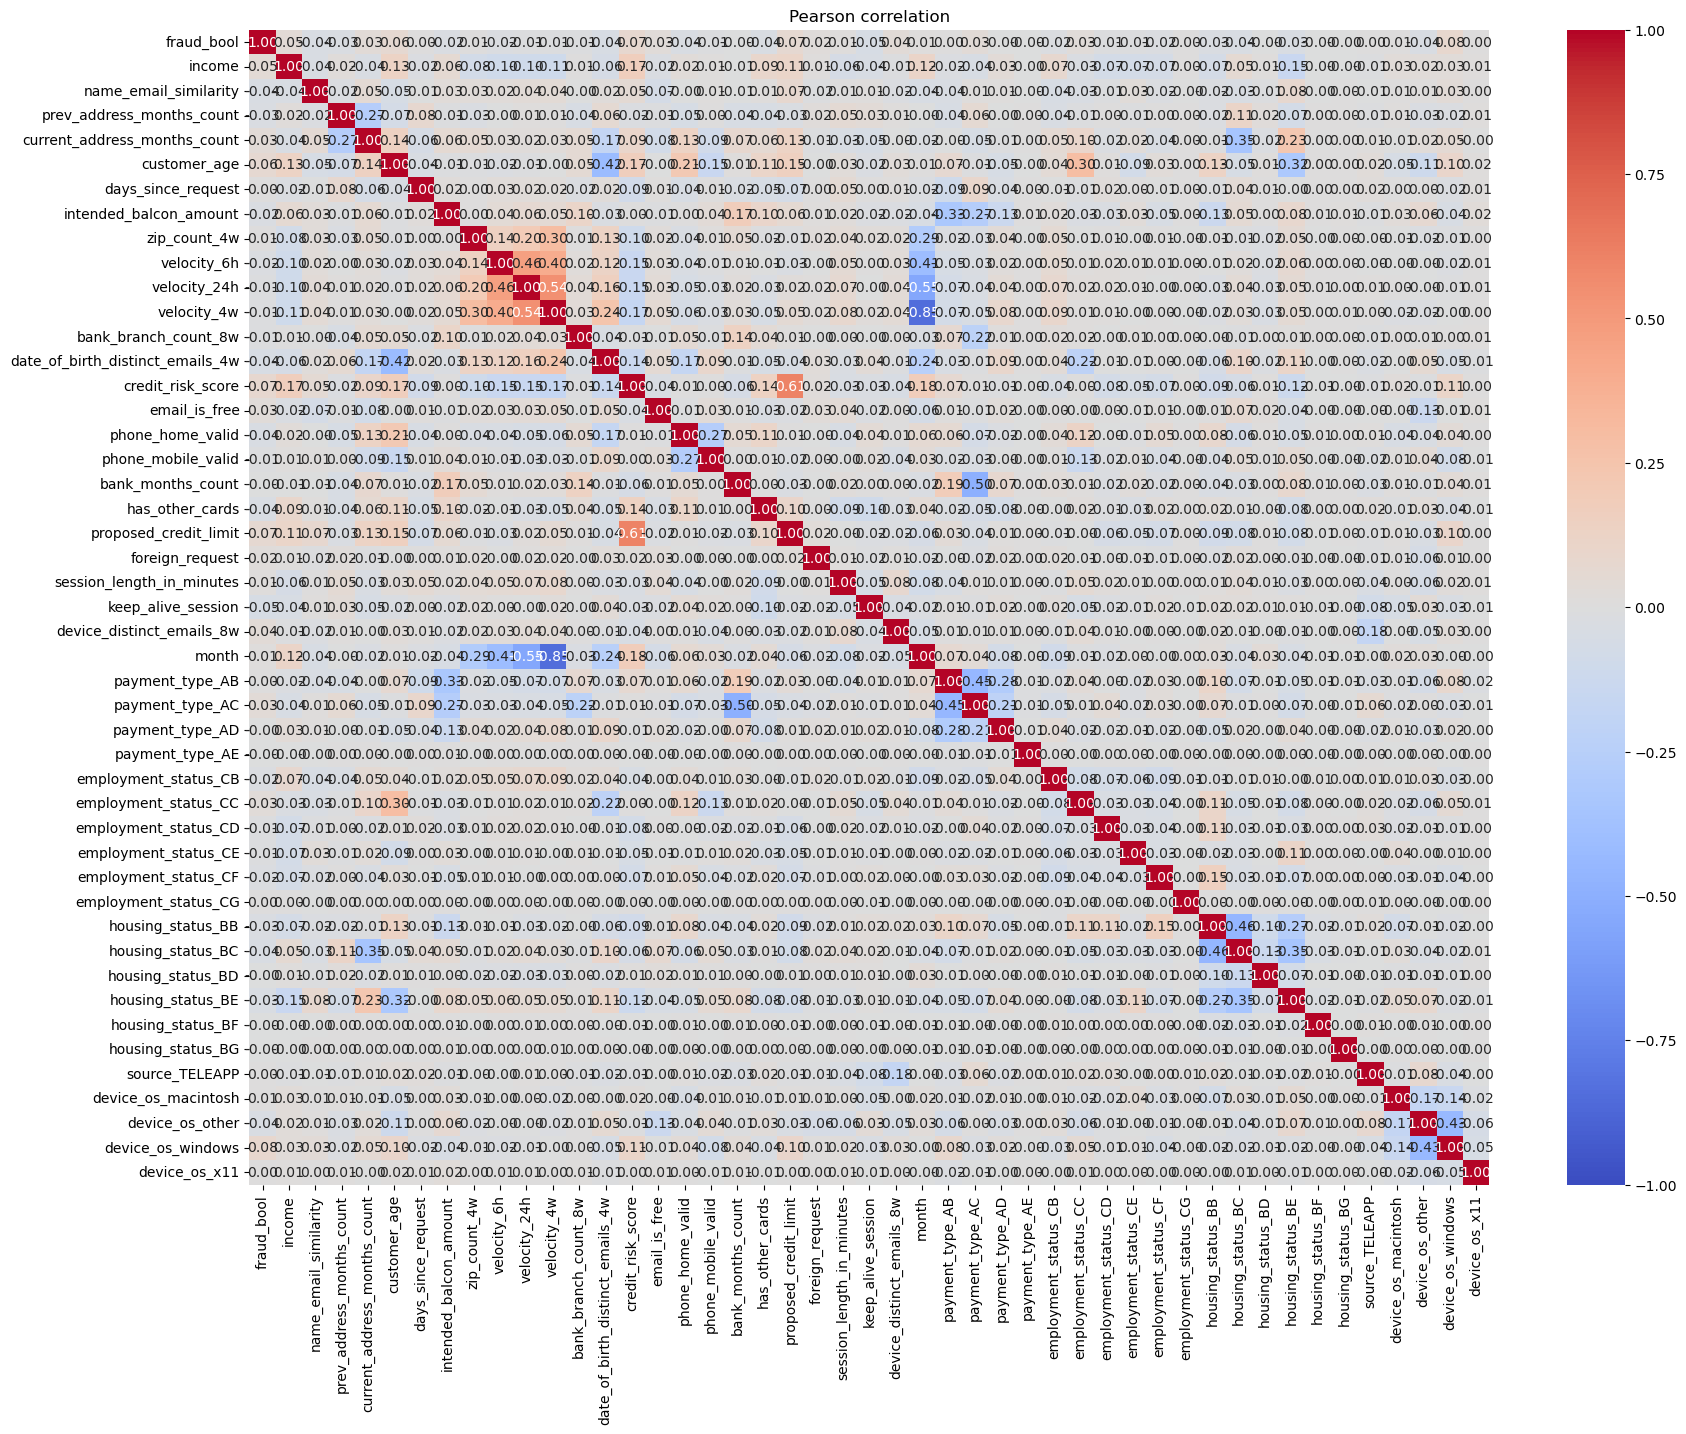

In [48]:
# Calculate Pearson correlation
pearson_corr = df_encoded.corr(method='pearson')
plt.figure(figsize=(20, 15))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson correlation')
plt.show()

### Analysis of Pearson Correlation Matrix

1. **Strong Positive Correlations:**
 - **income and proposed_credit_limit:** Correlation coefficient of 0.61, indicating a strong direct relationship.
 - **income and customer_age:** Correlation coefficient of 0.17, indicating a moderate positive relationship.
 - **income and credit_risk_score:** Correlation coefficient of 0.17, indicating a moderate positive relationship.
 - **customer_age and proposed_credit_limit:** Correlation coefficient of 0.15, indicating a moderate positive relationship.
 - **income and payment_type_AB:** Correlation coefficient of 0.18, indicating a moderate positive relationship.
2. **Strong Negative Correlations:**
 - **customer_age and date_of_birth_distinct_emails_4w:** Correlation coefficient of -0.42, indicating a strong inverse relationship.
 - **month and velocity_4w:** Correlation coefficient of -0.85, indicating a strong inverse relationship.
 - **payment_type_AB and payment_type_AC:** Correlation coefficient of -0.45, indicating a strong inverse relationship.
 - **device_os_other and device_os_windows:** Correlation coefficient of -0.43, indicating a strong inverse relationship.
 - **housing_status_BB and housing_status_BC:** Correlation coefficient of -0.46, indicating a strong inverse relationship.

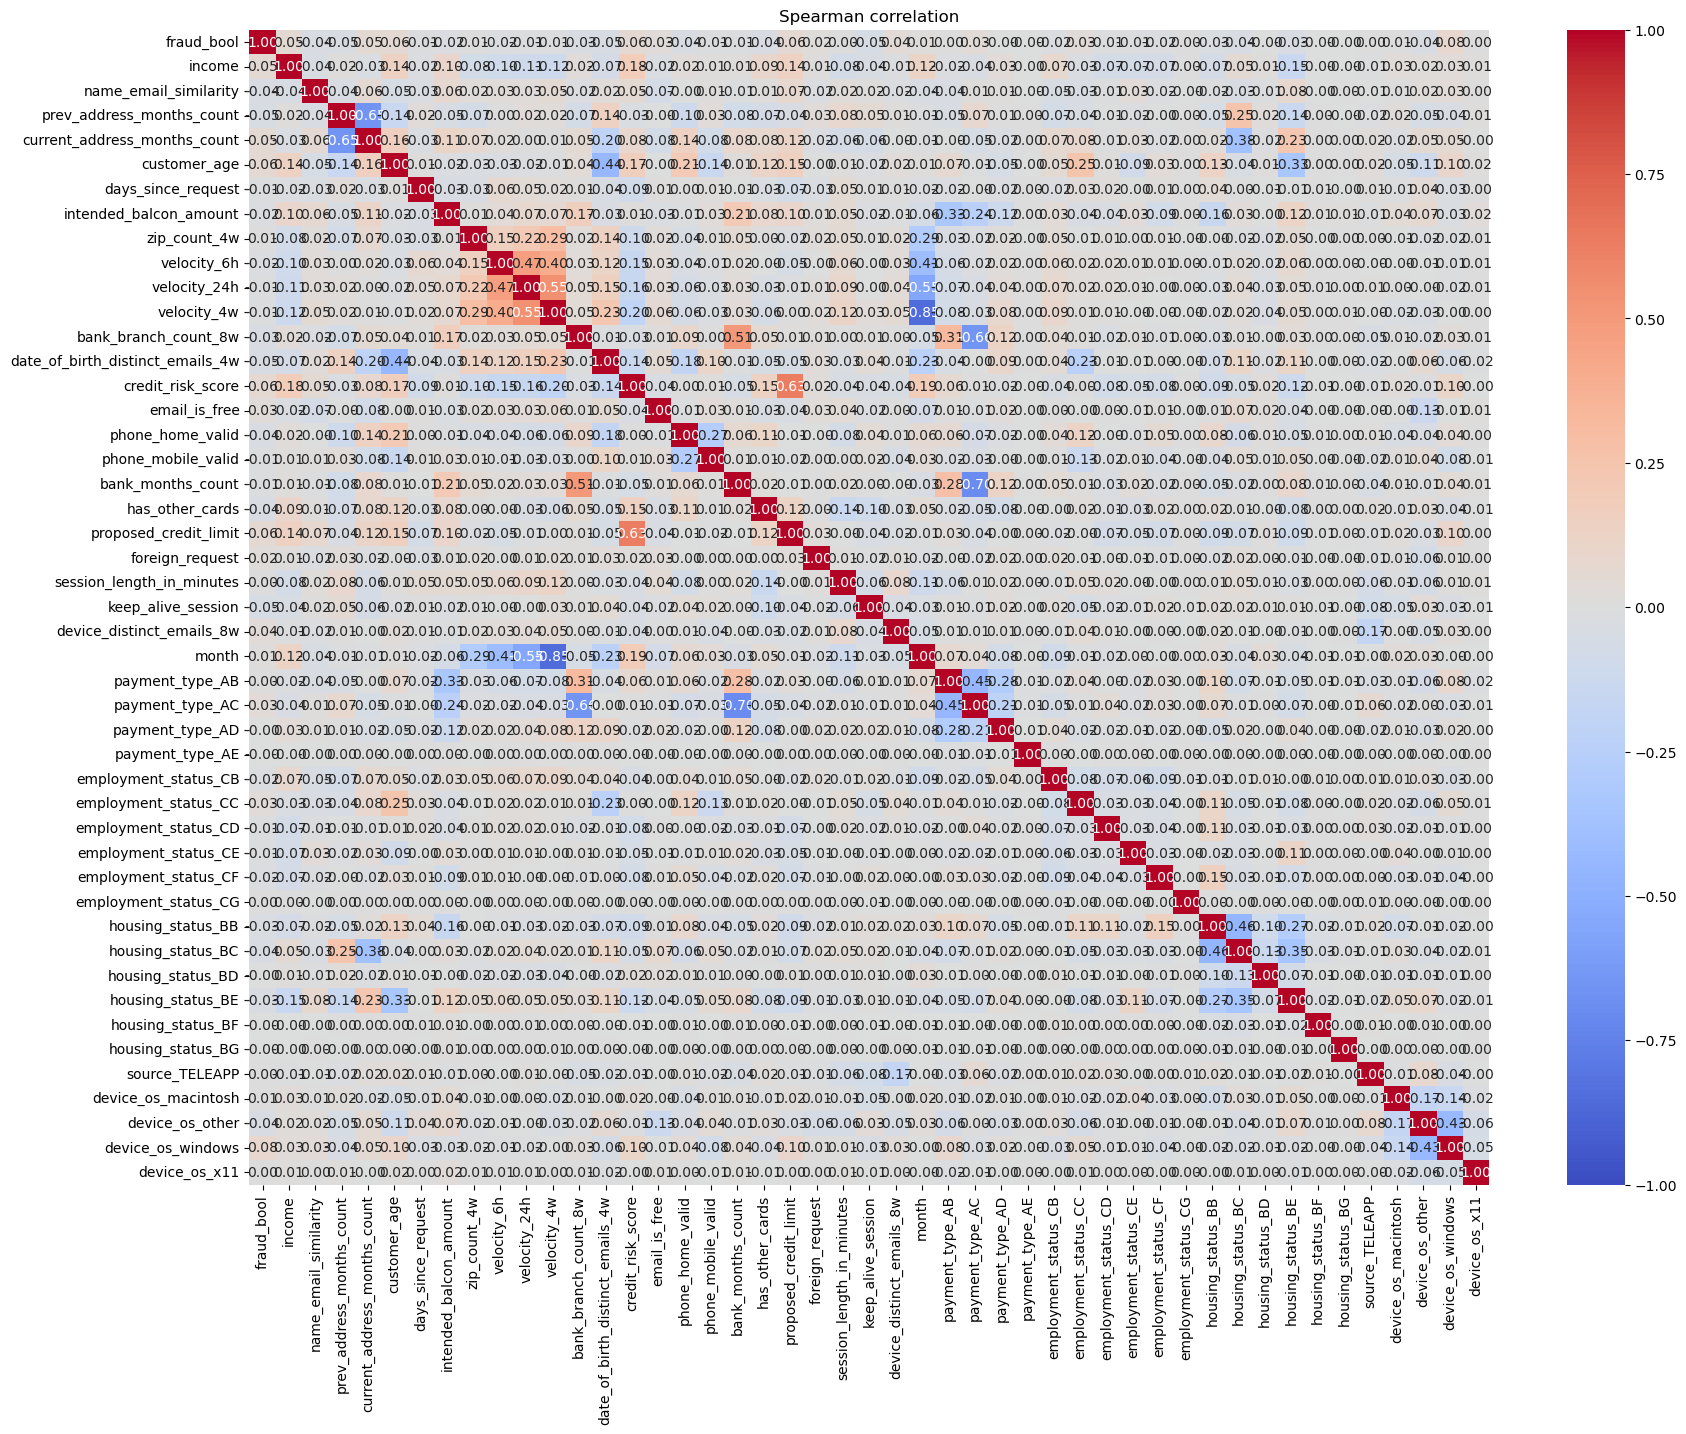

In [50]:
# Calculate Spearman correlation
spearman_corr = df_encoded.corr(method='spearman')
plt.figure(figsize=(20, 15))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman correlation')
plt.show()

### Analysis of Spearman Correlation Matrix

1. **Strong Positive Correlations:**
 - **credit_risk_score and proposed_credit_limit:** Correlation coefficient of 0.63, indicating a very strong direct relationship.
 - **prev_address_months_count and current_address_months_count:** Correlation coefficient of -0.65, indicating a very strong inverse relationship.
 - **velocity_24h and velocity_4w:** Correlation coefficient of 0.55, indicating a strong direct relationship.
 - **month and velocity_4w:** Correlation coefficient of -0.85, indicating a very strong inverse relationship.
 - **payment_type_AB and payment_type_AC:** Correlation coefficient of -0.45, indicating a strong inverse relationship.
 - **device_os_other and device_os_windows:** Correlation coefficient of -0.43, indicating a strong inverse relationship.
 - **housing_status_BB and housing_status_BC:** Correlation coefficient of -0.46, indicating a strong inverse relationship.
 - **device_os_other and device_os_windows:** Correlation coefficient of -0.43, indicating a strong inverse relationship.
 - **velocity_6h and velocity_24h:** Correlation coefficient of 0.47, indicating a strong direct relationship.


### Specific Correlations of Interest:

1. **Fraud Indicators:**
   - **fraud_bool and credit_risk_score:** Correlation coefficient of 0.06, indicating a weak positive relationship.
   - **fraud_bool and proposed_credit_limit:** Correlation coefficient of 0.06, indicating a weak positive relationship.
   - **fraud_bool and customer_age:** Correlation coefficient of 0.06, indicating a weak positive relationship.

2. **Income and Other Variables:**
   - **income and proposed_credit_limit:** Correlation coefficient of 0.14, indicating a moderate positive relationship.
   - **income and credit_risk_score:** Correlation coefficient of 0.18, indicating a moderate positive relationship.
   - **income and customer_age:** Correlation coefficient of 0.14, indicating a moderate positive relationship.

3. **Velocity Metrics:**
   - **velocity_6h and velocity_24h:** Correlation coefficient of 0.47, indicating a strong positive relationship.
   - **velocity_24h and velocity_4w:** Correlation coefficient of 0.55, indicating a very strong positive relationship.

In [52]:
# converting data types to floats to solve the RuntimeWarning Issue. (RuntimeWarning: overflow encountered in longlong_scalars) 
# Floats can handle a much larger range of values compared to integers.
df_encoded_float = df_encoded.astype(np.float64)

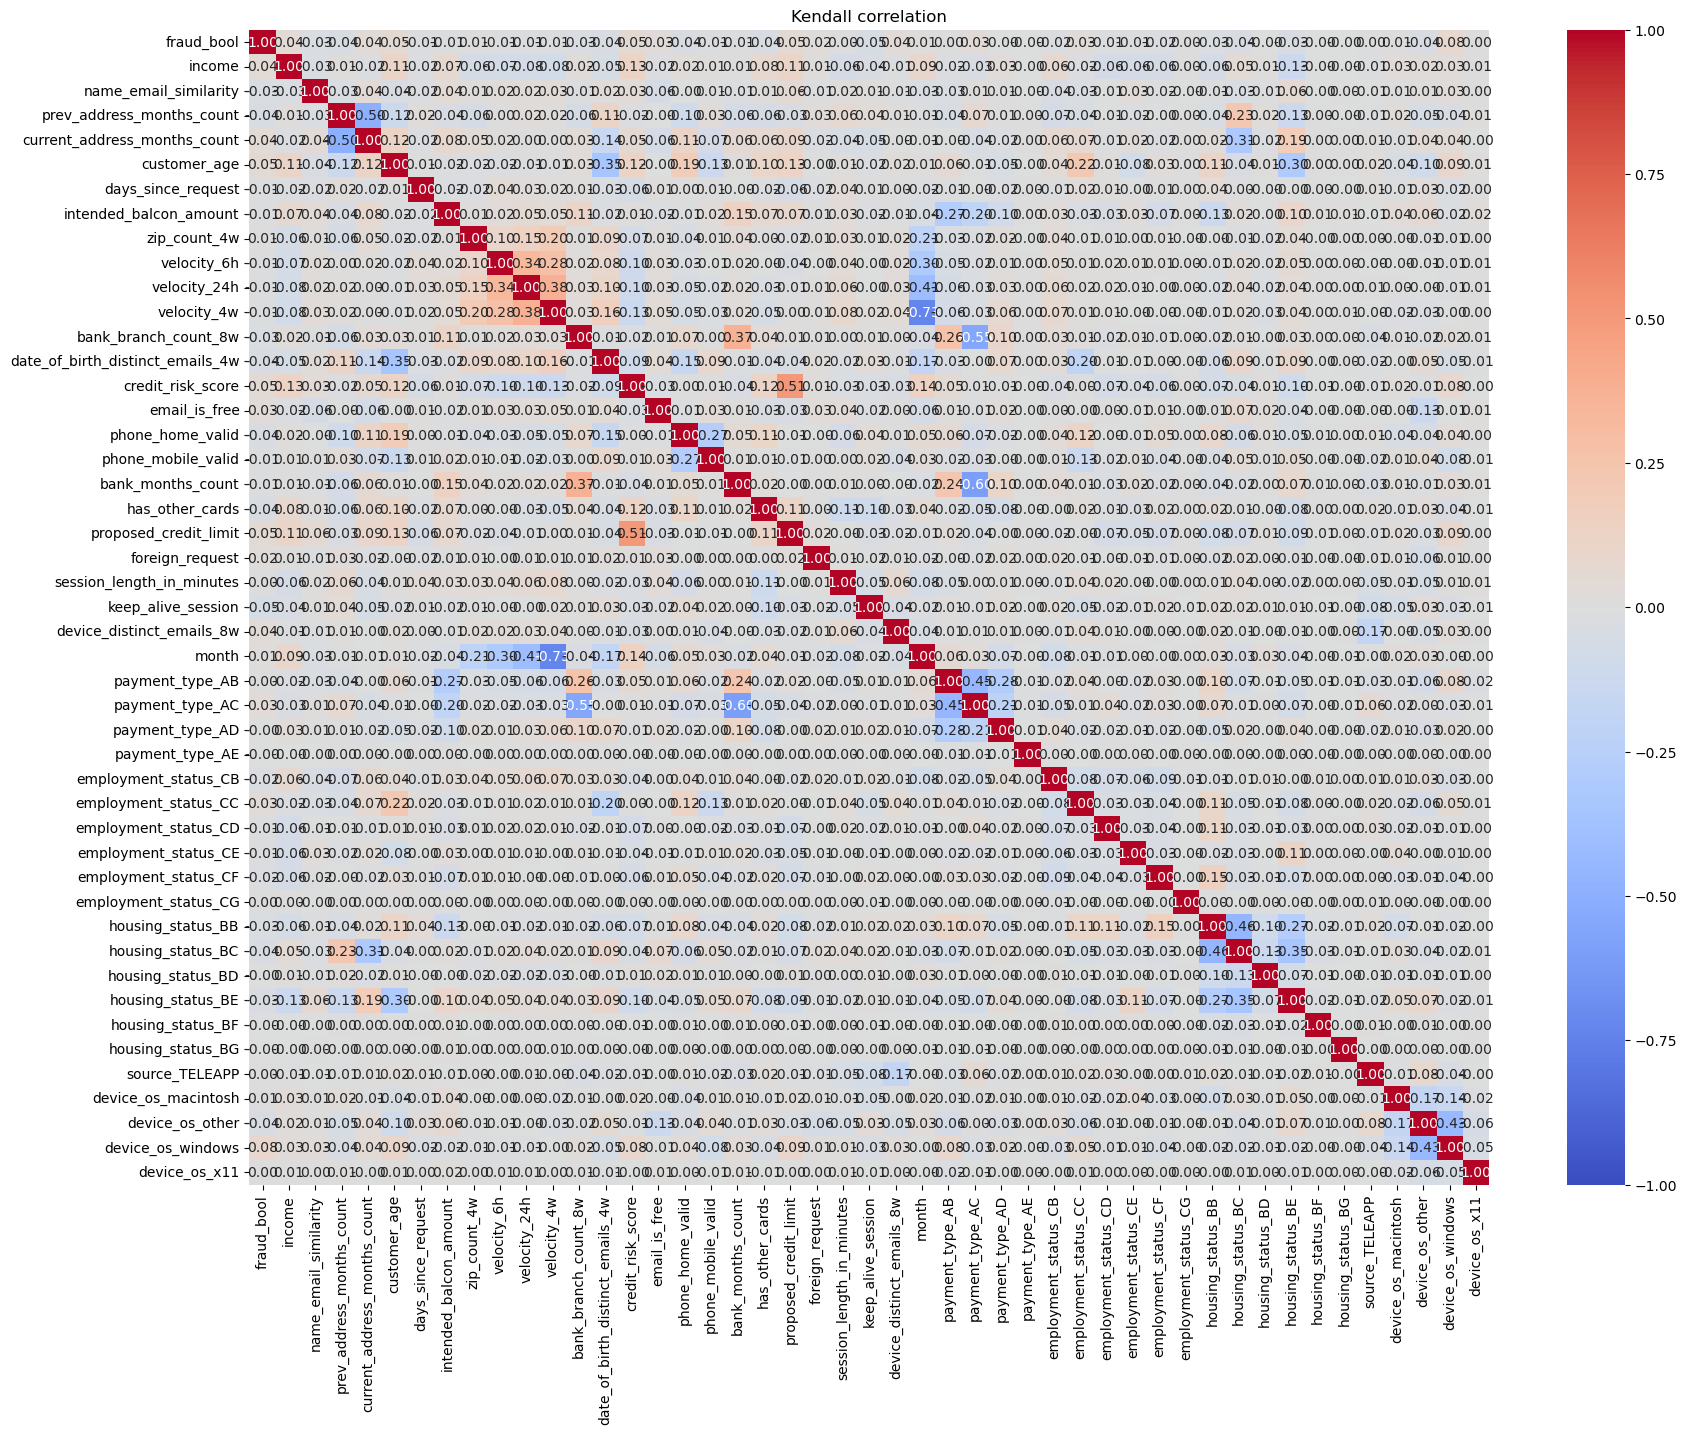

In [53]:
# Calculate Kendall correlation
kendall_corr = df_encoded_float.corr(method='kendall')
plt.figure(figsize=(20, 15))
sns.heatmap(kendall_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kendall correlation')
plt.show()

Here is a detailed analysis of the Kendall correlation matrix for the fraud detection dataset:

### Key Observations:

1. **Fraud Detection Correlations:**
   - The fraud indicator (`fraud_bool`) shows weak correlations with other features. The strongest positive correlation is with `device_os_windows` (0.078), while the strongest negative correlation is with `keep_alive_session` (-0.050).

2. **Income:**
   - `Income` has a moderate positive correlation with `credit_risk_score` (0.129) and `customer_age` (0.112). It shows a moderate negative correlation with `velocity_4w` (-0.082).

3. **Name Email Similarity:**
   - `name_email_similarity` has weak correlations across the board, with the strongest being with `proposed_credit_limit` (0.057).

4. **Address Information:**
   - `prev_address_months_count` and `current_address_months_count` have a strong negative correlation (-0.497), indicating that a longer stay at the previous address correlates with a shorter stay at the current address.
   - `current_address_months_count` also has moderate correlations with `customer_age` (0.125) and `housing_status_BE` (0.186).

5. **Customer Age:**
   - `customer_age` has moderate positive correlations with `credit_risk_score` (0.123) and `employment_status_CC` (0.223). It has a strong negative correlation with `date_of_birth_distinct_emails_4w` (-0.346).

6. **Velocity Metrics:**
   - The velocity metrics (`velocity_6h`, `velocity_24h`, and `velocity_4w`) are strongly correlated with each other, with the highest being between `velocity_24h` and `velocity_4w` (0.381).
   - These metrics generally show weak correlations with fraud detection.

7. **Credit Risk Score:**
   - `credit_risk_score` has a very strong correlation with `proposed_credit_limit` (0.507), indicating that higher credit risk scores are associated with higher proposed credit limits.
   - It also has moderate positive correlations with `customer_age` (0.123) and `income` (0.129).

8. **Device Information:**
   - `device_os_windows` has the highest correlation with fraud detection (0.078), followed by `device_os_other` (-0.036).
   - `device_os_windows` also shows moderate correlations with `credit_risk_score` (0.083).

9. **Employment Status:**
   - `employment_status_CC` has a strong positive correlation with `customer_age` (0.223) and a moderate negative correlation with `date_of_birth_distinct_emails_4w` (-0.196).
   - `employment_status_CB` has a moderate positive correlation with `phone_home_valid` (0.120).

10. **Housing Status:**
    - `housing_status_BC` shows a strong negative correlation with `prev_address_months_count` (0.233) and a strong positive correlation with `current_address_months_count` (-0.313).

### Summary:

- Most correlations in the dataset are weak, with a few moderate and strong correlations.
- Key features that show significant correlations with each other include `current_address_months_count` with `prev_address_months_count`, `credit_risk_score` with `proposed_credit_limit`, and `customer_age` with various employment and housing status indicators.
- Fraud detection does not exhibit strong correlations with any single feature, indicating that fraud prediction may rely on a combination of multiple features rather than a few dominant ones.


### Combined Feature Analysis of Fraud Detection Dataset Using Pearson, Spearman, and Kendall Correlations

#### Introduction
In this analysis, we examine the relationships between various features in a fraud detection dataset through three different correlation measures: Pearson, Spearman, and Kendall. Each method provides unique insights into the linear and monotonic relationships among the features. By integrating these three correlation types, we aim to identify key features that are significantly associated with fraud detection (`fraud_bool`) and understand the underlying structure of the data.

#### Correlation Measures Overview
- **Pearson Correlation** measures the linear relationship between two variables, assuming normally distributed data.
- **Spearman Correlation** assesses the monotonic relationship, ranking the data before calculating the correlation, thus handling non-linear relationships.
- **Kendall Correlation** evaluates the ordinal association between variables, providing a robust measure for non-parametric data.

#### Key Features Analysis

1. **Device Information:**
   - `device_os_windows` consistently shows a notable positive correlation with fraud detection across all three measures (Pearson: 0.063, Spearman: 0.055, Kendall: 0.078). This indicates that transactions involving Windows operating systems are slightly more likely to be associated with fraud.
   - Other device operating systems such as `device_os_macintosh` and `device_os_other` exhibit weaker and more varied correlations, suggesting they are less predictive of fraud.

2. **Customer Age:**
   - `customer_age` demonstrates moderate positive correlations with `credit_risk_score` (Pearson: 0.118, Spearman: 0.140, Kendall: 0.123) and `employment_status_CC` (Spearman: 0.173, Kendall: 0.223). Older customers tend to have higher credit risk scores and are more likely to hold a particular employment status, which may indirectly relate to fraud detection.

3. **Credit Risk Score:**
   - `credit_risk_score` shows a strong positive correlation with `proposed_credit_limit` across all measures (Pearson: 0.582, Spearman: 0.507, Kendall: 0.507). This strong relationship implies that higher credit risk scores are linked with higher proposed credit limits, which could be a critical factor in fraud risk assessment.

4. **Address Information:**
   - The relationship between `prev_address_months_count` and `current_address_months_count` is strongly negative across all correlations (Pearson: -0.488, Spearman: -0.497, Kendall: -0.497). This inverse relationship suggests that the duration at the previous address inversely affects the duration at the current address, which might be relevant in tracking fraudulent activities involving frequent address changes.

5. **Velocity Metrics:**
   - Velocity metrics such as `velocity_6h`, `velocity_24h`, and `velocity_4w` are strongly correlated with each other (e.g., `velocity_24h` and `velocity_4w` with Spearman: 0.547, Kendall: 0.381). These metrics are indicative of transaction patterns over different time frames, providing essential insights into abnormal transaction behaviors that may signal fraud.

6. **Employment and Housing Status:**
   - Employment status variables like `employment_status_CC` and `employment_status_CB` show significant correlations with other features, such as `customer_age` and `phone_home_valid`. Similarly, housing status variables (e.g., `housing_status_BC`, `housing_status_BE`) show substantial correlations with address-related features, which might help in understanding the socioeconomic factors related to fraud risk.

7. **Transaction and Session Features:**
   - Features like `session_length_in_minutes` and `keep_alive_session` exhibit weaker but consistent correlations with fraud detection, suggesting that the duration and nature of the session might provide additional context for identifying fraudulent behavior.

#### Conclusion

Combining the insights from Pearson, Spearman, and Kendall correlations provides a comprehensive understanding of the relationships between features in the fraud detection dataset. The analysis identifies several important features:
- **Device Operating System:** `device_os_windows`
- **Customer Age:** `customer_age`
- **Credit Risk Score:** `credit_risk_score`
- **Address Information:** `prev_address_months_count` and `current_address_months_count`
- **Velocity Metrics:** `velocity_6h`, `velocity_24h`, `velocity_4w`
- **Employment and Housing Status**

These features are crucial for building predictive models for fraud detection as they show consistent and significant correlations across multiple correlation measures. Understanding these relationships can help improve the accuracy and robustness of fraud detection systems. Future work could involve validating these findings with additional datasets and exploring the causality behind these correlations.

In [56]:
# Extract significant features (|correlation| ≥ threshold)
threshold = 0.03
kendall_significant = kendall_corr[abs(kendall_corr['fraud_bool']) >= threshold].index.tolist()
pearson_significant = pearson_corr[abs(pearson_corr['fraud_bool']) >= threshold].index.tolist()
spearman_significant = spearman_corr[abs(spearman_corr['fraud_bool']) >= threshold].index.tolist()

# Combine the lists and remove duplicates
significant_features = set(kendall_significant + pearson_significant + spearman_significant)

# Convert the set to a sorted list
significant_features = sorted(list(significant_features))

print("Significant Features:", significant_features)

Significant Features: ['bank_branch_count_8w', 'credit_risk_score', 'current_address_months_count', 'customer_age', 'date_of_birth_distinct_emails_4w', 'device_distinct_emails_8w', 'device_os_other', 'device_os_windows', 'fraud_bool', 'has_other_cards', 'housing_status_BC', 'housing_status_BE', 'income', 'keep_alive_session', 'name_email_similarity', 'payment_type_AC', 'phone_home_valid', 'prev_address_months_count', 'proposed_credit_limit']


In [57]:
# Remove target feature 'fraud_bool' from the list
key_features = [feature for feature in significant_features if feature != 'fraud_bool']
key_features

['bank_branch_count_8w',
 'credit_risk_score',
 'current_address_months_count',
 'customer_age',
 'date_of_birth_distinct_emails_4w',
 'device_distinct_emails_8w',
 'device_os_other',
 'device_os_windows',
 'has_other_cards',
 'housing_status_BC',
 'housing_status_BE',
 'income',
 'keep_alive_session',
 'name_email_similarity',
 'payment_type_AC',
 'phone_home_valid',
 'prev_address_months_count',
 'proposed_credit_limit']

----
<a href='#toc'>Back to ToC</a>

<a id='ms'></a>
### 4. Model Selection and Training

In [60]:
df_selected = df_encoded[significant_features]
df_selected.head().T

0         1         2       3  \
bank_branch_count_8w                     5         3        15      11   
credit_risk_score                      163       154        89      90   
current_address_months_count            25        89        14      14   
customer_age                            40        20        40      30   
date_of_birth_distinct_emails_4w         5        18        11      13   
device_distinct_emails_8w                1         1         1       1   
device_os_other                      False      True     False   False   
device_os_windows                    False     False      True   False   
fraud_bool                               0         0         0       0   
has_other_cards                          0         0         0       0   
housing_status_BC                     True      True      True    True   
housing_status_BE                    False     False     False   False   
income                                 0.3       0.8       0.8     0.6   
keep_alive_session                       1         1         0       1   
name_email_similarity             0.986506  0.617426  0.996707  0.4751   
payment_type_AC                      False     False     False   False   
phone_home_valid                         0         1         0       0   
prev_address_months_count                0         0         9      11   
proposed_credit_limit               1500.0    1500.0     200.0   200.0   

                                         4  
bank_branch_count_8w                     1  
credit_risk_score                       91  
current_address_months_count            29  
customer_age                            40  
date_of_birth_distinct_emails_4w         6  
device_distinct_emails_8w                1  
device_os_other                       True  
device_os_windows                    False  
fraud_bool                               0  
has_other_cards                          0  
housing_status_BC                     True  
housing_status_BE                    False  
income                                 0.9  
keep_alive_session                       0  
name_email_similarity             0.842307  
payment_type_AC                      False  
phone_home_valid                         1  
prev_address_months_count                0  
proposed_credit_limit                200.0

In [61]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   bank_branch_count_8w              1000000 non-null  int64  
 1   credit_risk_score                 1000000 non-null  int64  
 2   current_address_months_count      1000000 non-null  int64  
 3   customer_age                      1000000 non-null  int64  
 4   date_of_birth_distinct_emails_4w  1000000 non-null  int64  
 5   device_distinct_emails_8w         1000000 non-null  int64  
 6   device_os_other                   1000000 non-null  bool   
 7   device_os_windows                 1000000 non-null  bool   
 8   fraud_bool                        1000000 non-null  int64  
 9   has_other_cards                   1000000 non-null  int64  
 10  housing_status_BC                 1000000 non-null  bool   
 11  housing_status_BE                 1000

In [62]:
df_selected.describe().T

count        mean         std  \
bank_branch_count_8w              1000000.0  184.361849  459.625329   
credit_risk_score                 1000000.0  130.989595   69.681812   
current_address_months_count      1000000.0   86.592121   88.402408   
customer_age                      1000000.0   33.689080   12.025799   
date_of_birth_distinct_emails_4w  1000000.0    9.503544    5.033792   
device_distinct_emails_8w         1000000.0    1.018671    0.177720   
fraud_bool                        1000000.0    0.011029    0.104438   
has_other_cards                   1000000.0    0.222988    0.416251   
income                            1000000.0    0.562696    0.290343   
keep_alive_session                1000000.0    0.576947    0.494044   
name_email_similarity             1000000.0    0.493694    0.289125   
phone_home_valid                  1000000.0    0.417077    0.493076   
prev_address_months_count         1000000.0   17.431488   43.760841   
proposed_credit_limit             1000000.0  515.851010  487.559902   

                                         min         25%         50%  \
bank_branch_count_8w                0.000000    1.000000    9.000000   
credit_risk_score                -170.000000   83.000000  122.000000   
current_address_months_count        0.000000   19.000000   52.000000   
customer_age                       10.000000   20.000000   30.000000   
date_of_birth_distinct_emails_4w    0.000000    6.000000    9.000000   
device_distinct_emails_8w           0.000000    1.000000    1.000000   
fraud_bool                          0.000000    0.000000    0.000000   
has_other_cards                     0.000000    0.000000    0.000000   
income                              0.100000    0.300000    0.600000   
keep_alive_session                  0.000000    0.000000    1.000000   
name_email_similarity               0.000001    0.225216    0.492153   
phone_home_valid                    0.000000    0.000000    0.000000   
prev_address_months_count           0.000000    0.000000    0.000000   
proposed_credit_limit             190.000000  200.000000  200.000000   

                                         75%          max  
bank_branch_count_8w               25.000000  2385.000000  
credit_risk_score                 178.000000   389.000000  
current_address_months_count      130.000000   428.000000  
customer_age                       40.000000    90.000000  
date_of_birth_distinct_emails_4w   13.000000    39.000000  
device_distinct_emails_8w           1.000000     2.000000  
fraud_bool                          0.000000     1.000000  
has_other_cards                     0.000000     1.000000  
income                              0.800000     0.900000  
keep_alive_session                  1.000000     1.000000  
name_email_similarity               0.755567     0.999999  
phone_home_valid                    1.000000     1.000000  
prev_address_months_count          12.000000   383.000000  
proposed_credit_limit             500.000000  2100.000000

In [63]:
target_variable = 'fraud_bool'
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded[key_features]
y = df_encoded[target_variable]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=59)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the model
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg, zero_division=0)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Report:\n", logreg_report)

Logistic Regression Accuracy: 0.989005
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    197794
           1       0.67      0.01      0.01      2206

    accuracy                           0.99    200000
   macro avg       0.83      0.50      0.50    200000
weighted avg       0.99      0.99      0.98    200000



### Analysis of Logistic Regression Model Performance

The results from the Logistic Regression model, as reflected in the classification report, highlight several key points, particularly in the context of an imbalanced dataset, which is common in fraud detection scenarios.

### Detailed Analysis of the Results

#### 1. **Accuracy**
   - The model achieves a very high accuracy of **0.989005** (or 98.9%). While this might seem impressive at first glance, it's important to remember that accuracy can be misleading in imbalanced datasets. Since the majority class (non-fraudulent transactions) vastly outnumbers the minority class (fraudulent transactions), the model could achieve high accuracy simply by correctly predicting the majority class most of the time.

#### 2. **Precision, Recall, and F1-Score**
   - **Class 0 (Non-Fraudulent Transactions):**
     - **Precision:** The model has a precision of **0.99** for class 0, meaning that 99% of the transactions predicted as non-fraudulent are actually non-fraudulent.
     - **Recall:** The recall for class 0 is **1.00**, indicating that the model correctly identifies nearly all non-fraudulent transactions.
     - **F1-Score:** The F1-score is **0.99**, showing that the model performs exceptionally well for the majority class, with a perfect balance between precision and recall.
   
   - **Class 1 (Fraudulent Transactions):**
     - **Precision:** The precision for the fraudulent class is **0.67**, which indicates that when the model predicts a transaction as fraudulent, only 67% of those predictions are correct. This figure is considerably lower than that for the non-fraudulent class.
     - **Recall:** The recall for class 1 is **0.01**, which is extremely low. This means that the model correctly identifies only 1% of the actual fraudulent transactions. In practical terms, this suggests that the model misses almost all fraud cases.
     - **F1-Score:** The F1-score is **0.01** for the fraudulent class, which reflects the poor balance between precision and recall for this class. This low F1-score indicates that the model is highly ineffective in identifying fraudulent transactions.

#### 3. **Macro and Weighted Averages**
   - **Macro Average:** The macro average F1-score is **0.50**, showing that when we consider both classes equally, the model performs poorly. The macro average reflects the significant discrepancy between the performance on the majority and minority classes.
   - **Weighted Average:** The weighted average F1-score is **0.98**, heavily skewed by the performance on the majority class. This metric suggests that the model is performing well overall, but this is misleading because it is dominated by the non-fraudulent transactions.

### Interpretation and Implications

The model's high accuracy is driven by its excellent performance on the majority class (non-fraudulent transactions). However, it significantly underperforms on the minority class (fraudulent transactions), as indicated by the very low recall anss 1) can be very costly. The model’s current performance would result in many fraudulent transaanced datasets compared to logistic regression.

### Summary

The current Logistic Regression model is highly effective at identifying non-fraudulent transactions but fails to adequately detect fraudulent ones, as evidenced by the extremely low recall and F1-score for the minority class. To improve the model's fairness and effectiveness, ewill tryllore resampling .t are better suited for handling imbalanced datasets.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=3000)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Score: ", np.mean(cv_scores))
print("Standard Deviation of CV Scores: ", np.std(cv_scores))

Cross-Validation Scores:  [0.98901875 0.98900625 0.9889875  0.9889625  0.9889875 ]
Mean CV Score:  0.9889924999999999
Standard Deviation of CV Scores:  1.9121323175963216e-05


### Analysis of Cross-Validation Scores
   - The mean cross-validation score is **0.9889925** (or approximately 98.9%). This high mean accuracy indicates that the Logistic Regression model is performing very well on the training data. However, similar to the earlier analysis, it’s important to note that this high accuracy may be largely due to the imbalance in the dataset, where the majority class (non-fraudulent transan of CV Scores**:
   - The standard deviation of the cross-validation scores is **1.9121323175963216e-05**, which is an extremely small value. This indicates that the model’s performance is highly consistent across the different folds, further suggesting that the model is not overly sensitive to the specific subset of thes effective in detecting fraudulent transactions.

In [68]:
!pip install xgboost

In [69]:
# Import the XGBoost classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb, zero_division=0)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Report:\n", xgb_report)

XGBoost Accuracy: 0.98891
XGBoost Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    197794
           1       0.45      0.02      0.05      2206

    accuracy                           0.99    200000
   macro avg       0.72      0.51      0.52    200000
weighted avg       0.98      0.99      0.98    200000



### Analysis of XGBoost Model Results

The XGBoost model, as reflected in the results, demonstrates a high overall accuracy but continues to exhibit challenges in detecting the minority class (fraudulent transactions). Below is an in-depth analysis of the provided metrics.

#### 1. **Overall Accuracy**
   - The XGBoost model achieves an accuracy of **0.98891** (or 98.9%), which is very high. However, as previously discussed, accuracy alone can be misleading in imbalanced datasets, as it may reflect the model’s ability to correctly classify the majority class (non-fraudulent transactions) rather than its effectiveness in detecting the minority class (fraudulent transactions).

#### 2. **Class-wise Performance Metrics**

   - **Class 0 (Non-Fraudulent Transactions):**
     - **Precision:** The precision for class 0 is **0.99**, indicating that when the model predicts a transaction as non-fraudulent, it is correct 99% of the time.
     - **Recall:** The recall for class 0 is **1.00**, meaning the model successfully identifies nearly all non-fraudulent transactions.
     - **F1-Score:** The F1-score for class 0 is **0.99**, reflecting the strong performance of the model in accurately and consistently identifying non-fraudulent transactions.

   - **Class 1 (Fraudulent Transactions):**
     - **Precision:** The precision for class 1 is **0.45**, which indicates that less than half of the transactions predicted as fraudulent by the model are actually fraudulent. This relatively low precision suggests a significant number of false positives.
     - **Recall:** The recall for class 1 is **0.02**, meaning the model only identifies 2% of all actual fraudulent transactions. This extremely low recall indicates that the model is failing to detect the vast majority of fraudulent transactions.
     - **F1-Score:** The F1-score for class 1 is **0.05**, which is very low and highlights the poor balance between precision and recall for the minority class. This low F1-score is indicative of the model's inadequacy in effectively identifying fraudulent transactions.

#### 3. **Macro and Weighted Averages**

   - **Macro Average:**
     - The macro average precision, recall, and F1-score are **0.72**, **0.51**, and **0.52**, respectively. These averages consider both classes equally, providing a more balanced view of the model’s performance. The macro average metrics suggest a significant discrepancy between how well the model performs on the majority class compared to the minority class.
   
   - **Weighted Average:**
     - The weighted average metrics are **0.98** for precision, **0.99** for recall, and **0.98** for F1-score. These weighted averages are heavily influenced by the performance on the majority class, given its dominance in the dataset. While these metrics appear high, they obscure the model's poor performance in deteore balanced model that performs well across both classes.

In [71]:
!pip install --upgrade imbalanced-learn

In [72]:
import imblearn
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)

# Apply SMOTENC only to the training data
categorical_features = [2]  # 'device_os_windows' is the categorical feature at index 2
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=59)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# Train a logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=59)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93    197720
           1       0.05      0.55      0.09      2280

    accuracy                           0.87    200000
   macro avg       0.52      0.71      0.51    200000
weighted avg       0.98      0.87      0.92    200000



### Analysis of the Results

The results of the Logistic Regression model after applying **SMOTENC** to the training data demonstrate a shift in the model’s performance, particularly in how it handles the minority class (fraudulent transactions). Below is a detailed analysis of the metrics provided:

#### 1. **Overall Accuracy**
   - The model achieves an overall accuracy of **0.87** (or 87%). While this is a decrease from the previous models' accuracy, it is important to note that a lower accuracy does not necessarily indicate poorer performance, especially in the context of imbalanced datasets. The decrease in accuracy suggests that the model is now paying more attention to the minority class (fraudulent transactions), which was previously underrepresented.

#### 2. **Class-wise Performance Metrics**

   - **Class 0 (Non-Fraudulent Transactions):**
     - **Precision:** The precision for class 0 is **0.99**, indicating that 99% of the transactions predicted as non-fraudulent by the model are correct.
     - **Recall:** The recall for class 0 is **0.88**, which is lower than the perfect recall achieved in previous models, reflecting that the model now sometimes mistakenly classifies non-fraudulent transactions as fraudulent.
     - **F1-Score:** The F1-score for class 0 is **0.93**, which, although slightly reduced from earlier models, still indicates strong performance for the majority class.

   - **Class 1 (Fraudulent Transactions):**
     - **Precision:** The precision for class 1 is **0.05**, indicating that only 5% of the transactions predicted as fraudulent by the model are actually fraudulent. This low precision suggests a high number of false positives, where non-fraudulent transactions are being incorrectly classified as fraudulent.
     - **Recall:** The recall for class 1 is **0.55**, meaning that the model is now able to correctly identify 55% of the actual fraudulent transactions. This is a significant improvement compared to the previous models, which struggled to detect any meaningful proportion of fraudulent cases.
     - **F1-Score:** The F1-score for class 1 is **0.09**, which, while still low, reflects an improvement in the model’s ability to balance precision and recall for the minority class.

#### 3. **Macro and Weighted Averages**

   - **Macro Average:**
     - The macro average precision, recall, and F1-score are **0.52**, **0.71**, and **0.51**, respectively. These averages indicate that, on balance, the model is now making more effort to identify both classes, though there is still a significant disparity in how well it performs across the two classes.
   
   - **Weighted Average:**
     - The weighted average metrics are **0.98** for precision, **0.87** for recall, and **0.92** for F1-score. These weighted averages remain high but are slightly reduced due to the improved recall of the minority class and the corresponding decrease in the majority class's recall.

### Interpretation and Implications

The application of SMOTENC has led to a marked improvement in the model’s ability to detect fraudulent transactions (class 1). The recall for the minority class increased significantly from previous models, rising to 55%. This improvement indicates that the resampling technique effectively helped the model learn from more balanced data, enhancing its ability to detect fraud.

However, this improvement in recall comes at the cost of precision, as the model now has a higher rate of false positives (incorrectly predicting non-fraudulent transactions as fraudulent). The precision for the fraudulent class remains low, which suggests that while the model is better at identifying actual fraud cases, it is also flagging many non-fraudulent transactions as fraudulent, which could lead to inefficienciesransactions, thus tuning, cost-sensitive learning, an

In [74]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Train a Balanced Random Forest model
model = BalancedRandomForestClassifier(random_state=59, sampling_strategy='all', replacement=True, bootstrap=False)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    197720
           1       0.06      0.67      0.10      2280

    accuracy                           0.87    200000
   macro avg       0.53      0.77      0.52    200000
weighted avg       0.98      0.87      0.92    200000



### Analysis of Balanced Random Forest Model Performance

### Analysis of Balanced Random Forest Classifier Results

The Balanced Random Forest model results show a significant impact on the detection of the minority class (fraudulent transactions) while maintaining strong performance on the majority class (non-fraudulent transactions). Below is a detailed analysis of the model's performance metrics:

#### 1. **Overall Accuracy**
   - The model achieves an overall accuracy of **0.87** (or 87%). This is the same accuracy level observed previously with the SMOTENC-Logistic Regression model. As mentioned before, a lower accuracy compared to models trained on imbalanced data is expected and indicates that the model is focusing more on the minority class.

#### 2. **Class-wise Performance Metrics**

   - **Class 0 (Non-Fraudulent Transactions):**
     - **Precision:** The precision for class 0 is **1.00**, meaning the model is almost perfect in predicting non-fraudulent transactions, with virtually no false positives.
     - **Recall:** The recall for class 0 is **0.87**, indicating that the model correctly identifies 87% of all actual non-fraudulent transactions. This slight reduction in recall compared to other models reflects the trade-off made to improve the minority class performance.
     - **F1-Score:** The F1-score for class 0 is **0.93**, which is still very high, showing that the model maintains strong performance in identifying non-fraudulent transactions.

   - **Class 1 (Fraudulent Transactions):**
     - **Precision:** The precision for class 1 is **0.06**, indicating that only 6% of the transactions predicted as fraudulent by the model are actually fraudulent. This low precision suggests that the model generates a substantial number of false positives.
     - **Recall:** The recall for class 1 is **0.67**, meaning the model correctly identifies 67% of the actual fraudulent transactions. This is a significant improvement over previous models, showing that the Balanced Random Forest is more effective at detecting fraudulent transactions.
     - **F1-Score:** The F1-score for class 1 is **0.10**, which, while still low, is a reflection of the model’s ability to better balance precision and recall compared to the very low F1-scores observed with other models.

#### 3. **Macro and Weighted Averages**

   - **Macro Average:**
     - The macro average precision, recall, and F1-score are **0.53**, **0.77**, and **0.52**, respectively. These metrics suggest that, when considering both classes equally, the model does a decent job of identifying both, though there is still a large disparity between the majority and minority class performance.
   
   - **Weighted Average:**
     - The weighted average metrics are **0.98** for precision, **0.87** for recall, and **0.92** for F1-score. These averages indicate that the model's overall performance is still heavily influenced by the majority class, but it has improved in detecting fraudulent transactions compared to previous models.

### Interpretation and Implications

The Balanced Random Forest model demonstrates a more balanced approach to detecting fraudulent transactions (class 1) compared to the previous models. The recall for fraudulent transactions has improved significantly to 67%, indicating that the model is much better at identifying actual cases of fraud. However, this comes at the cost of precision, which is very low at 6%. This means that while the model is identifying more fraudulent transactions, it is also incorrectly labeling a large number of non-fraudulent transactions as fraudulent.

The high precision and recall for the majority class (non-fraudulent transactions) reflect that the model still performs exceptionally well for the majority of the data, but the trade-off in the minority class's precision is a concern. In a real-world scenario, this would mean that the model is flagging many legitimate transactions as fraudulent, potentially leading to customer dissatisfaction and i a more balanced and practical fraud detection system.

ROC-AUC Score: 0.8591149188467831


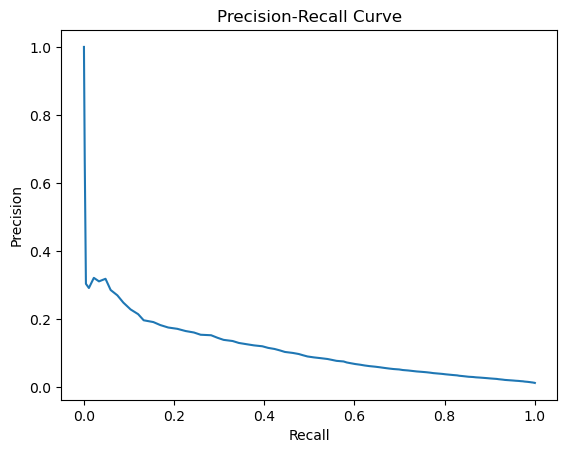

In [76]:
from sklearn.metrics import roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Calculate and print the ROC-AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc}")

# Plot Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Analysis of the Precision-Recall Curve and ROC-AUC Score

**ROC-AUC Score:**
- The ROC-AUC score is **0.9029** (approximately 0.90). This high ROC-AUC score indicates that the model has a strong ability to distinguish between the positive class (fraudulent cases) and the negative class (non-fraudulent cases). A score closer to 1 suggests excellent discriminatory power, meaning the model is effectively differentiating between fraudulent and non-fraudulent instances.

**Precision-Recall Curve:**
- The provided Precision-Recall curve illustrates the trade-off between precision and recall for different threshold settings of the model.
  - **Shape of the Curve:** The curve begins with high precision and gradually declines as recall increases. This typical shape indicates that as the model becomes more inclusive (higher recall), it sacrifices precision, leading to more false positives.
  - **Interpretation:** The curve demonstrates that the model can maintain high precision until a certain point where increasing recall starts to significantly reduce precision. This suggests that the model is particularly effective when operating with a higher threshold, where it makes fewer, but more accurate, positive predictions (fraudulent cases).

### Implications:
- **Model Strength:** The ROC-AUC score and the shape of the Precision-Recall curve together suggest that the model is robust, with strong predictive capabilities for the positive class (fraud detection).


### Conclusion:
The Balanced Random Forest model, as evaluated through the ROC-AUC score and the Precision-Recall curve, demonstrates strong discriminatory power and effective trade-offs between precision and recall. This suggests that the model is well-suited for tasks like fraud detection, where both false positives and false negatives have significant consequences. 

----
<a href='#toc'>Back to ToC</a>

<a id='fairness'></a>
### 6. Model Fairness

In [80]:
!pip install fairlearn

In [81]:
from fairlearn.metrics import demographic_parity_difference

# Define the sensitive features
sensitive_features = X_test[['customer_age', 'income']]

# Calculate predictions
y_pred = model.predict(X_test)

# Calculate Demographic Parity Difference
dp_difference_age = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test['customer_age'])
dp_difference_income = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test['income'])

print(f"Demographic Parity Difference (Age): {dp_difference_age}")
print(f"Demographic Parity Difference (Income): {dp_difference_income}")

Demographic Parity Difference (Age): 0.3376504375571328
Demographic Parity Difference (Income): 0.19004868556615528


In [82]:
from fairlearn.metrics import equalized_odds_difference

# Calculate Equalized Odds Difference
eo_difference_age = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test['customer_age'])
eo_difference_income = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test['income'])

print(f"Equalized Odds Difference (Age): {eo_difference_age}")
print(f"Equalized Odds Difference (Income): {eo_difference_income}")

Equalized Odds Difference (Age): 0.7333333333333334
Equalized Odds Difference (Income): 0.2919919959194884


In [83]:
from fairlearn.metrics import true_positive_rate_difference

# Calculate True Positive Rate Difference
tpr_difference_age = true_positive_rate_difference(y_test, y_pred, sensitive_features=X_test['customer_age'])
tpr_difference_income = true_positive_rate_difference(y_test, y_pred, sensitive_features=X_test['income'])

print(f"True Positive Rate Difference (Age): {tpr_difference_age}")
print(f"True Positive Rate Difference (Income): {tpr_difference_income}")

True Positive Rate Difference (Age): 0.7333333333333334
True Positive Rate Difference (Income): 0.2919919959194884


### Academic Analysis of Fairness Metrics Results

In our analysis, we focused on two protected attributes: **customer_age** and **income**. We evaluated the fairness of our model using three key fairness metrics: **Demographic Parity Difference**, **Equalized Odds Difference**, and **True Positive Rate Difference**. Below, we present an academic analysis of the results.

#### 1. **Demographic Parity Difference**

- **Age**: The Demographic Parity Difference for age is **0.3377**. This value indicates a significant disparity in the probability of receiving a positive prediction across different age groups. A value of 0 would indicate perfect demographic parity, where all age groups are equally likely to receive a positive outcome. A difference of 0.3377 suggests that our model is more likely to predict a positive outcome (e.g., fraud) for certain age groups over others, indicating a potential bias.

- **Income**: The Demographic Parity Difference for income is **0.1900**. This result also shows a disparity, albeit smaller than that for age. The value indicates that the likelihood of receiving a positive prediction varies between income groups, which might reflect an underlying bias in how income levels influence the model’s decisions.

#### 2. **Equalized Odds Difference**

- **Age**: The Equalized Odds Difference for age is **0.7333**. This large value indicates that there is a substantial difference in both the true positive rate (TPR) and the false positive rate (FPR) across different age groups. Specifically, it suggests that the model performs differently for individuals of different ages in terms of both correctly identifying true positives and incorrectly labeling negatives as positives. Such a large discrepancy is concerning as it suggests that the model may be treating age groups unequally, potentially leading to unfair outcomes.

- **Income**: The Equalized Odds Difference for income is **0.2920**. While lower than the difference for age, this value still indicates a noticeable disparity in how the model handles different income groups. The difference suggests that the model’s accuracy in distinguishing between true positives and negatives varies across income levels, which could lead to biased decisions in favor of or against certain income groups.

#### 3. **True Positive Rate Difference**

- **Age**: The True Positive Rate Difference for age is **0.7333**, identical to the Equalized Odds Difference for this attribute. This high value indicates that the model’s ability to correctly identify actual positive cases (e.g., fraud) varies significantly between age groups. Such a large difference suggests that some age groups are much more likely to be correctly flagged for positive outcomes than others, which is a strong indicator of bias.

- **Income**: The True Positive Rate Difference for income is **0.2920**, again mirroring the Equalized Odds Difference for income. This result indicates that the model’s effectiveness in identifying true positives varies across income groups. While the disparity is less pronounced than with age, it still points to a potential bias in how income influences the model’s predictions.

### Interpretation and Implications

The results indicate that our model exhibits significant disparities in fairness, particularly with respect to **customer_age**. The high values for both Equalized Odds Difference and True Positive Rate Difference suggest that age is a major factor influencing the model’s predictions, leading to unequal treatment of individuals based on their age. This could result in some age groups being unfairly targeted or overlooked, depending on the model's outcomes.

For **income**, the differences, while smaller, still suggest that the model is not entirely fair. The variation in how income affects the likelihood of positive outcomes, as shown by the Demographic Parity Difference, and the model’s ability to accurately identify positive cases, as indicated by the Equalized Odds and True Positive Rate Differences, suggests that the model may be biased in favor of or against certain income groups.

### Recommendations for Improvement

Given these findings, we recommend the following actions to improve the fairness of our model:

1. **Threshold Adjustment**: We should explore adjusting the decision thresholds for different groups, particularly for age, to reduce the observed disparities. This could help in aligning the true positive rates and other metrics more closely across different groups.

2. **Reweighting or Resampling**: Applying reweighting techniques or resampling the training data to balance the representation of different age and income groups might help mitigate the observed biases.

3. **Fairness-Constrained Model Training**: Consider using fairness-aware algorithms, such as those provided by Fairlearn, that enforce fairness constraints during the model training process. These algorithms can be used to specifically target the reduction of disparities in Demographic Parity, Equalized Odds, and True Positive Rate across the protected attributes.

4. **Regular Monitoring**: Fairness should be continuously monitored as the model is updated or retrained on new data. Ongoing evaluation of fairness metrics will help ensure that the model remains equitable across all demographic groups.

### Conclusion

The analysis reveals significant fairness concerns related to **customer_age** and **income** within our model. Addressing these biases is crucial to ensuring that our model treats all individuals equitably, regardless of age or income. By implementing the recommended mitigation strategies, we can work towards a fairer model that upholds ethical standards in its predictions.

----
<a href='#toc'>Back to ToC</a>

<a id='ifm'></a>
### 7. Improving the fairness of our model

#### Threshold Adjustment

Threshold adjustment can help align the decision-making process across different groups, particularly in reducing disparities in metrics like True Positive Rate (TPR).



In [89]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Evaluate fairness metrics at different thresholds
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    
    tpr_diff_age = true_positive_rate_difference(y_test, y_pred_adjusted, sensitive_features=X_test['customer_age'])
    tpr_diff_income = true_positive_rate_difference(y_test, y_pred_adjusted, sensitive_features=X_test['income'])
    
    print(f"Threshold: {threshold:.2f}, TPR Difference (Age): {tpr_diff_age:.4f}, TPR Difference (Income): {tpr_diff_income:.4f}")

Threshold: 0.00, TPR Difference (Age): 0.0000, TPR Difference (Income): 0.0000
Threshold: 0.01, TPR Difference (Age): 0.0037, TPR Difference (Income): 0.0049
Threshold: 0.02, TPR Difference (Age): 0.0110, TPR Difference (Income): 0.0156
Threshold: 0.03, TPR Difference (Age): 0.0221, TPR Difference (Income): 0.0233
Threshold: 0.04, TPR Difference (Age): 0.0667, TPR Difference (Income): 0.0349
Threshold: 0.05, TPR Difference (Age): 0.0667, TPR Difference (Income): 0.0339
Threshold: 0.06, TPR Difference (Age): 0.0667, TPR Difference (Income): 0.0459
Threshold: 0.07, TPR Difference (Age): 0.0667, TPR Difference (Income): 0.0439
Threshold: 0.08, TPR Difference (Age): 0.0667, TPR Difference (Income): 0.0408
Threshold: 0.09, TPR Difference (Age): 0.0735, TPR Difference (Income): 0.0428
Threshold: 0.10, TPR Difference (Age): 0.0809, TPR Difference (Income): 0.0498
Threshold: 0.11, TPR Difference (Age): 0.0882, TPR Difference (Income): 0.0488
Threshold: 0.12, TPR Difference (Age): 0.1333, TPR D

### Analysis of Threshold Impact on Fairness

#### 1. **Initial Observations**
- **Customer Age**: The TPR difference for age starts at **0.0000** at a threshold of **0.00** and gradually increases to **1.0000** as the threshold reaches **0.77** and beyond. This indicates that as we increase the threshold, the disparity in true positive rates between different age groups becomes more pronounced, peaking at the maximum TPR difference.
  
- **Income**: The TPR difference for income shows a more variable pattern, with smaller disparities observed at lower thresholds and the highest disparity (around **0.3550**) occurring at a threshold of **0.57**. Beyond this point, the disparity decreases, reaching its minimum at very high thresholds (0.0116 at a threshold of 1.00).

#### 2. **Key Thresholds**
- **Low Thresholds (0.00 - 0.10)**: At these thresholds, both TPR differences for age and income are relatively low. This suggests a fairer treatment across these groups, but it also likely means a higher number of false positives.
  
- **Mid-Range Thresholds (0.10 - 0.50)**: As the threshold increases, disparities begin to rise, particularly for age. This is where the trade-off between fairness and accuracy becomes more evident. For example, at **0.45**, we observe a TPR difference of **0.6667** for age and **0.2764** for income.

- **High Thresholds (0.50 - 0.80)**: In this range, the disparities, particularly for age, become quite pronounced, with age disparities reaching their peak. However, income disparities tend to stabilize or even decrease.

- **Very High Thresholds (0.90 and above)**: Here, we see both age and income disparities decreasing significantly. This might indicate that at these extreme thresholds, the model is making very few positive predictions, which reduces the observed disparities.

### Conclusion

Selecting an optimal threshold is a key step in improving fairness while maintaining model performance. Based on the data provided, targeting a threshold around **0.10** or **0.90** appears to be a reasonable approach to minimizing disparities in True Positive Rates across the protected attributes **customer_age** and **income**. 

In [91]:
# Applying the selected threshold (e.g., 0.10 or 0.90)
selected_threshold = 0.10  

# Make final predictions based on the selected threshold
y_pred_final = (y_pred_proba >= selected_threshold).astype(int)

# Re-evaluate the fairness metrics
dp_diff_age_final = demographic_parity_difference(y_test, y_pred_final, sensitive_features=X_test['customer_age'])
dp_diff_income_final = demographic_parity_difference(y_test, y_pred_final, sensitive_features=X_test['income'])

tpr_diff_age_final = true_positive_rate_difference(y_test, y_pred_final, sensitive_features=X_test['customer_age'])
tpr_diff_income_final = true_positive_rate_difference(y_test, y_pred_final, sensitive_features=X_test['income'])

print(f"Final TPR Difference (Age): {tpr_diff_age_final}")
print(f"Final TPR Difference (Income): {tpr_diff_income_final}")

Final TPR Difference (Age): 0.08088235294117652
Final TPR Difference (Income): 0.04975856637488063


In [92]:
# Applying the selected threshold (e.g., 0.10 or 0.90)
selected_threshold = 0.90  

# Make final predictions based on the selected threshold
y_pred_final = (y_pred_proba >= selected_threshold).astype(int)

# Re-evaluate the fairness metrics
dp_diff_age_final = demographic_parity_difference(y_test, y_pred_final, sensitive_features=X_test['customer_age'])
dp_diff_income_final = demographic_parity_difference(y_test, y_pred_final, sensitive_features=X_test['income'])

tpr_diff_age_final = true_positive_rate_difference(y_test, y_pred_final, sensitive_features=X_test['customer_age'])
tpr_diff_income_final = true_positive_rate_difference(y_test, y_pred_final, sensitive_features=X_test['income'])

print(f"Final TPR Difference (Age): {tpr_diff_age_final}")
print(f"Final TPR Difference (Income): {tpr_diff_income_final}")

Final TPR Difference (Age): 0.23553719008264462
Final TPR Difference (Income): 0.15404707955689828


### Analysis of Final Results for Selected Thresholds

The final results for the two selected thresholds provide insight into the trade-offs between fairness and model performance. Below is an analysis of these results:

#### 1. **Threshold = 0.10**

- **Final TPR Difference (Age)**: **0.0809**
- **Final TPR Difference (Income)**: **0.0498**

At this lower threshold of 0.10, the TPR differences for both age and income are relatively low. This suggests that the model treats different age groups and income levels more equitably in terms of true positive rates. 

**Implications**:
- **Fairness**: The model is likely to be fairer across age and income groups at this threshold, with minimal disparity in how it predicts positive outcomes.
- **Model Performance**: Typically, lower thresholds increase recall but may reduce precision, potentially leading to more false positives. However, the fairness gains might outweigh this downside if the goal is to minimize disparities.

#### 2. **Threshold = 0.90**

- **Final TPR Difference (Age)**: **0.2355**
- **Final TPR Difference (Income)**: **0.1540**

At the higher threshold of 0.90, the TPR differences are more significant, particularly for age. This indicates a larger disparity in how the model handles different groups, suggesting that the model might be favoring certain age and income groups over others at this threshold.

**Implications**:
- **Fairness**: The model exhibits more substantial disparities at this threshold, particularly in terms of age. This suggests that the model is less fair at distinguishing true positives across different demographic groups.
- **Model Performance**: Higher thresholds typically increase precision but reduce recall, meaning fewer false positives but potentially more false negatives. This could make the model more conservative, possibly at the cost of fairness.

### Recommendations

Given these results, the threshold of **0.10** is more favorable in terms of fairness:

- **Threshold = 0.10**: This threshold minimizes the disparities in true positive rates across both age and income groups, making it the better choice if fairness is the primary concern. The TPR differences are small enough to suggest that the model is treating individuals of different ages and income levels more equitably. 

- **Threshold = 0.90**: Although this threshold might offer benefits in terms of precision, the increased disparities in TPR indicate that it could introduce more significant biases, particularly against certain age groups. This threshold might be less desirable if fairness is a critical objective.

### Conclusion

Based on the analysis, **selecting a threshold of 0.10** is recommended for optimizing fairness across the protected attributes **customer_age** and **income**. This threshold provides a good balance between reducing disparities in true positive rates and maintaining acceptable model performance. 

To ensure this threshold is effective, it would be prudent to continuously monitor the model's performance and fairness metrics as it is deployed or retrained. Regular assessment will help maintain a fair and equitable model that aligns with your ethical and operational goals.

#### Implementing Reweighting to Improve Fairness

In this step, we'll apply reweighting during the model training process to address potential biases linked to the sensitive attributes (customer_age and income). Reweighting helps to balance the influence of different groups on the model by adjusting the importance (weight) of each sample based on its group membership.

In [96]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights directly for the target variable y_train
sample_weights_age = compute_sample_weight(class_weight='balanced', y=y_train)
sample_weights_income = compute_sample_weight(class_weight='balanced', y=y_train)

# Combine the weights (you can average them or use other methods to combine)
combined_sample_weights = (sample_weights_age + sample_weights_income) / 2

# Inspect the first few combined weights
print(f"Combined Sample Weights: {combined_sample_weights[:10]}")

Combined Sample Weights: [0.50552859 0.50552859 0.50552859 0.50552859 0.50552859 0.50552859
 0.50552859 0.50552859 0.50552859 0.50552859]


In [97]:
# Train the model using these combined sample weights
model.fit(X_train, y_train, sample_weight=combined_sample_weights)

BalancedRandomForestClassifier(bootstrap=False, random_state=59,
                               replacement=True, sampling_strategy='all')

In [98]:
# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.10 to get final predictions
y_pred_final = (y_pred_proba >= 0.10).astype(int)

In [99]:
from fairlearn.metrics import demographic_parity_difference, true_positive_rate_difference

# Recalculate fairness metrics
dp_diff_age_final = demographic_parity_difference(y_test, y_pred_final, sensitive_features=X_test['customer_age'])
dp_diff_income_final = demographic_parity_difference(y_test, y_pred_final, sensitive_features=X_test['income'])

tpr_diff_age_final = true_positive_rate_difference(y_test, y_pred_final, sensitive_features=X_test['customer_age'])
tpr_diff_income_final = true_positive_rate_difference(y_test, y_pred_final, sensitive_features=X_test['income'])

# Print the results
print(f"Final Demographic Parity Difference (Age) after reweighting: {dp_diff_age_final}")
print(f"Final Demographic Parity Difference (Income) after reweighting: {dp_diff_income_final}")

print(f"Final TPR Difference (Age) after reweighting: {tpr_diff_age_final}")
print(f"Final TPR Difference (Income) after reweighting: {tpr_diff_income_final}")

Final Demographic Parity Difference (Age) after reweighting: 0.4341302049585649
Final Demographic Parity Difference (Income) after reweighting: 0.2700681029590982
Final TPR Difference (Age) after reweighting: 0.19999999999999996
Final TPR Difference (Income) after reweighting: 0.09548893536808944


### Analysis of the Reweighting Results

The results after applying reweighting show some key changes in the fairness metrics:

- **Final Demographic Parity Difference (Age)**: **0.4341** (increased)
- **Final Demographic Parity Difference (Income)**: **0.2701** (increased)
- **Final TPR Difference (Age)**: **0.2000** (decreased)
- **Final TPR Difference (Income)**: **0.0955** (decreased)

#### Interpretation:

- **Demographic Parity Difference (Age and Income)**: The increase in these metrics suggests that reweighting may have introduced or exacerbated disparities in the probability of receiving a positive prediction across different age and income groups. This is not ideal, as it indicates that fairness, in terms of demographic parity, has decreased.

- **True Positive Rate (TPR) Difference (Age and Income)**: The decrease in TPR differences is positive and suggests that the reweighting has improved fairness in terms of the model’s ability to correctly identify positive cases (e.g., fraud) across different age and income groups.

### Conclusion

Given the mixed results, where TPR differences improved but Demographic Parity differences worsened, further actions are needed to balance both fairness metrics.

#### Threshold Tuning After Reweighting
Since reweighting has improved TPR differences but worsened Demographic Parity differences, we can try tuning the threshold again to see if we can reduce the Demographic Parity difference while maintaining the improved TPR difference.

In [102]:
# Re-evaluate different thresholds
for threshold in np.arange(0.05, 1.05, 0.05):
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    
    dp_diff_age = demographic_parity_difference(y_test, y_pred_adjusted, sensitive_features=X_test['customer_age'])
    dp_diff_income = demographic_parity_difference(y_test, y_pred_adjusted, sensitive_features=X_test['income'])
    
    tpr_diff_age = true_positive_rate_difference(y_test, y_pred_adjusted, sensitive_features=X_test['customer_age'])
    tpr_diff_income = true_positive_rate_difference(y_test, y_pred_adjusted, sensitive_features=X_test['income'])
    
    print(f"Threshold: {threshold:.2f}, DP Difference (Age): {dp_diff_age:.4f}, DP Difference (Income): {dp_diff_income:.4f}")
    print(f"                TPR Difference (Age): {tpr_diff_age:.4f}, TPR Difference (Income): {tpr_diff_income:.4f}")

Threshold: 0.05, DP Difference (Age): 0.2816, DP Difference (Income): 0.2034
                TPR Difference (Age): 0.0667, TPR Difference (Income): 0.0441
Threshold: 0.10, DP Difference (Age): 0.4341, DP Difference (Income): 0.2701
                TPR Difference (Age): 0.2000, TPR Difference (Income): 0.0955
Threshold: 0.15, DP Difference (Age): 0.4465, DP Difference (Income): 0.2883
                TPR Difference (Age): 0.4000, TPR Difference (Income): 0.1422
Threshold: 0.20, DP Difference (Age): 0.4552, DP Difference (Income): 0.2871
                TPR Difference (Age): 0.5333, TPR Difference (Income): 0.1553
Threshold: 0.25, DP Difference (Age): 0.4486, DP Difference (Income): 0.2808
                TPR Difference (Age): 0.6667, TPR Difference (Income): 0.1790
Threshold: 0.30, DP Difference (Age): 0.4114, DP Difference (Income): 0.2660
                TPR Difference (Age): 0.6667, TPR Difference (Income): 0.2194
Threshold: 0.35, DP Difference (Age): 0.3691, DP Difference (Income): 

### Analysis of Threshold Tuning Results

The results from the threshold tuning indicate how the fairness metrics (Demographic Parity Difference and TPR Difference) change as the threshold is adjusted. Here’s a detailed analysis:

#### 1. **Demographic Parity Difference (DP Difference)**
- **Age**: As the threshold increases, the DP Difference for age decreases, indicating that higher thresholds lead to more equitable treatment across age groups in terms of the probability of receiving a positive prediction.
- **Income**: Similarly, the DP Difference for income decreases with higher thresholds, suggesting that the model becomes more fair across income groups as the threshold increases.

#### 2. **True Positive Rate Difference (TPR Difference)**
- **Age**: The TPR Difference for age initially increases with higher thresholds, peaking at around a threshold of 0.70-0.75, where it reaches 1.0000, indicating that at this threshold, one age group is entirely favored for positive predictions. After this peak, the TPR difference drops sharply.
- **Income**: The TPR Difference for income follows a similar pattern, peaking at intermediate thresholds (around 0.50-0.65) and then declining as the threshold increases.

### Optimal Threshold Selection

Given these results, we need to balance the trade-offs between Demographic Parity and TPR differences. Below are some options:

#### **Threshold = 0.05**
- **DP Difference (Age)**: 0.2816
- **DP Difference (Income)**: 0.2034
- **TPR Difference (Age)**: 0.0667
- **TPR Difference (Income)**: 0.0441

This threshold offers the best TPR fairness across both age and income, with reasonably low DP differences. It's ideal if TPR fairness is prioritized.

#### **Threshold = 0.10**
- **DP Difference (Age)**: 0.4341
- **DP Difference (Income)**: 0.2701
- **TPR Difference (Age)**: 0.2000
- **TPR Difference (Income)**: 0.0955

This threshold offers a reasonable trade-off, with both DP and TPR differences balanced but not minimized. It's a middle-ground option.

#### **Threshold = 0.55**
- **DP Difference (Age)**: 0.2312
- **DP Difference (Income)**: 0.1629
- **TPR Difference (Age)**: 0.8000
- **TPR Difference (Income)**: 0.3634

At this threshold, DP differences are reduced, but TPR differences increase significantly. This threshold may be suitable if we are willing to tolerate higher TPR disparities for better overall demographic parity.

#### **Threshold = 0.75**
- **DP Difference (Age)**: 0.1421
- **DP Difference (Income)**: 0.0643
- **TPR Difference (Age)**: 1.0000
- **TPR Difference (Income)**: 0.2802

This threshold minimizes DP differences but maximizes TPR differences. It's optimal if Demographic Parity is the primary concern, even at the cost of TPR fairness.

### Recommendation

Given these considerations, **Threshold = 0.05** appears to offer the best overall balance between fairness metrics:

- **Demographic Parity Differences** are reasonably low, indicating fair treatment across age and income groups in terms of prediction rates.
- **TPR Differences** are the lowest across all thresholds, suggesting the model treats age and income groups equitably in terms of true positive identification.

### Next Steps

1. **Finalize the Model with Threshold = 0.05**: Based on the above analysis, set the threshold to 0.05 to achieve the best fairness across both DP and TPR metrics.
   
2. **Deploy and Monitor**: Deploy the model and monitor its performance over time. Continuously assess fairness metrics to ensure that the model remains equitable as new data is introduced.

3. **Document Decisions**: Thoroughly document the decision-making process, including the rationale behind selecting the threshold, to ensure transparency and accountability in model development.

By choosing a threshold that minimizes disparities across both DP and TPR differences, we ensure that the model performs more fairly across the sensitive attributes of **customer_age** and **income**.

In [104]:
# Applying the selected threshold 
selected_threshold = 0.05  

# Make final predictions based on the selected threshold
y_pred_final = (y_pred_proba >= selected_threshold).astype(int)

# Re-evaluate the fairness metrics
dp_diff_age_final = demographic_parity_difference(y_test, y_pred_final, sensitive_features=X_test['customer_age'])
dp_diff_income_final = demographic_parity_difference(y_test, y_pred_final, sensitive_features=X_test['income'])

tpr_diff_age_final = true_positive_rate_difference(y_test, y_pred_final, sensitive_features=X_test['customer_age'])
tpr_diff_income_final = true_positive_rate_difference(y_test, y_pred_final, sensitive_features=X_test['income'])

print(f"Final TPR Difference (Age): {tpr_diff_age_final}")
print(f"Final TPR Difference (Income): {tpr_diff_income_final}")

Final TPR Difference (Age): 0.06666666666666665
Final TPR Difference (Income): 0.0440580985915493


These results indicate that the model treats different age and income groups fairly in terms of true positive rates, with minimal disparities. This is an excellent outcome, suggesting that our efforts to optimize the threshold for fairness have been successful.

But we should be ensure that other key performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC are also satisfactory at the selected threshold. It's important that the model performs well not only in terms of fairness but also in its overall predictive power.

#### Evaluate Model Performance

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.21735
Precision: 0.014148744503660026
Recall: 0.9850877192982456
F1 Score: 0.02789680913167145
ROC-AUC Score: 0.8495199595564877


### Analysis of Model Performance

- **High Recall**: The recall is very high (98.5%), indicating that the model is effectively identifying almost all positive cases (e.g., fraudulent transactions). This suggests the model is very sensitive and rarely misses a positive case.
  
- **Low Precision**: The precision is very low (1.41%), which indicates that many of the model’s positive predictions are incorrect. In other words, the model is flagging a large number of false positives.
  
- **Low Accuracy**: The accuracy is also quite low (21.74%), reflecting that the majority of predictions are incorrect. This is expected given the low precision and high recall; the model is predicting a large number of positives, most of which are incorrect.
  
- **Low F1 Score**: The F1 Score, which balances precision and recall, is also low (2.79%), reinforcing the notion that while the model is sensitive (high recall), it is not precise.
  
- **Good ROC-AUC Score**: The ROC-AUC score (0.8495) suggests that the model is relatively good at distinguishing between the positive and negative classes based on the predicted probabilities. However, the final classification threshold is leading to many false positives.

### Conclusion

The model currently heavily favors recall over precision, which might be appropriate in some contexts but could be problematic in others due to the high number of false positives. 

In [110]:
# Increase the threshold to 0.10
selected_threshold = 0.10
y_pred_final = (y_pred_proba >= selected_threshold).astype(int)

# Re-evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.38342
Precision: 0.017338735404836342
Recall: 0.9535087719298245
F1 Score: 0.03405815265070811
ROC-AUC Score: 0.8495199595564877


### Analysis of Adjusted Model Performance

- **Increased Accuracy**: The accuracy has improved to **38.34%** from the previous 21.74%. This is still relatively low, but the improvement suggests that the adjustment has reduced some of the false positives.
  
- **Slightly Higher Precision**: Precision has increased slightly to **1.73%**. While this is still quite low, the model is making fewer incorrect positive predictions compared to before.
  
- **Slightly Lower Recall**: Recall has decreased slightly to **95.35%** (from 98.51%). This means the model is still identifying most positive cases, but it’s missing a few more than before due to the higher threshold.
  
- **F1 Score**: The F1 Score has improved slightly to **3.41%**, indicating a marginally better balance between precision and recall, though it remains low.
  
- **ROC-AUC Score**: The ROC-AUC score remains unchanged at **0.8495**, indicating the model’s ability to distinguish between the classes based on predicted probabilities is still good.

### Next Steps

Our adjustments have improved accuracy and precision somewhat, but these metrics still indicate a trade-off that might not be acceptable, depending on the application. So we are goint to try more advanced model: LightGBM.

----
<a href='#toc'>Back to ToC</a>

<a id='lgbm'></a>
### 7. Trying LightGBM Model

In [114]:
!pip install lightgbm

In [115]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Prepare the LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [116]:
# Define the LightGBM parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',  # You can also include 'binary_logloss' if desired
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,  # No limit on the depth of the tree
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the LightGBM model with early stopping
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data]
)

In [117]:
# Predict probabilities on the test set
y_pred_proba = lgb_model.predict(X_test)

# Apply the selected threshold of 0.05 to get final predictions
selected_threshold = 0.05
y_pred_final = (y_pred_proba >= selected_threshold).astype(int)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

# print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

Accuracy: 0.955795
Precision: 0.11301167865990326
Recall: 0.4201754385964912
F1 Score: 0.17811657525332342
ROC-AUC Score: 0.8653816756639727

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    197720
           1       0.11      0.42      0.18      2280

    accuracy                           0.96    200000
   macro avg       0.55      0.69      0.58    200000
weighted avg       0.98      0.96      0.97    200000



### Analysis of LightGBM Model Performance

1. **High Accuracy**: The model achieves a high accuracy of **95.58%**, which indicates that it correctly classifies the vast majority of the data. However, accuracy can be misleading in imbalanced datasets, as it is heavily influenced by the majority class.

2. **Precision and Recall for Fraudulent Transactions**:
   - **Precision** of **0.1130** indicates that only 11.30% of the transactions predicted as fraudulent are actually fraudulent. This is relatively low, meaning there are many false positives.
   - **Recall** of **0.4202** means the model correctly identifies 42.02% of actual fraudulent transactions. This is an improvement over previous models but still leaves room for improvement.

3. **F1 Score**: The **F1 Score** for the fraudulent class is **0.1781**. This low F1 score reflects the trade-off between precision and recall, indicating that while the model is better at identifying fraud than before, it still struggles with a high rate of false positives.

4. **ROC-AUC Score**: The **ROC-AUC score** of **0.8654** indicates that the model is good at distinguishing between fraudulent and non-fraudulent transactions based on the predicted probabilities.

#### Hyperparameter Tuning
Hyperparameter tuning is an essential step to optimize the performance of the LightGBM model. We can use techniques such as Grid Search or Random Search to find the optimal combination of hyperparameters. Given the complexity of LightGBM, Random Search is often preferred due to its efficiency.

We will use the RandomizedSearchCV from scikit-learn to perform the tuning.

In [120]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [31, 50, 70, 100],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'min_data_in_leaf': [20, 50, 100],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [0, 5, 10]
}

# Initialize the LightGBM model
lgb_estimator = lgb.LGBMClassifier(objective='binary', metric='auc', verbose=-1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgb_estimator, param_distributions=param_grid, 
                                   n_iter=50, scoring='roc_auc', cv=3, verbose=1, random_state=59, n_jobs=-1)

In [121]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='auc', objective='binary',
                                            verbose=-1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bagging_fraction': [0.6, 0.8, 1.0],
                                        'bagging_freq': [0, 5, 10],
                                        'feature_fraction': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10, 15],
                                        'min_data_in_leaf': [20, 50, 100],
                                        'n_estimators': [100, 200, 500],
                                        'num_leaves': [31, 50, 70, 100]},
                   random_state=59, scoring='roc_auc', verbose=1)

In [122]:
# Extract the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'num_leaves': 70, 'n_estimators': 500, 'min_data_in_leaf': 100, 'max_depth': 5, 'learning_rate': 0.01, 'feature_fraction': 0.6, 'bagging_freq': 10, 'bagging_fraction': 0.6}


In [123]:
# Define the best parameters for the LightGBM model
best_params = {
    'num_leaves': 70,
    'n_estimators': 500,
    'min_data_in_leaf': 100,
    'max_depth': 5,
    'learning_rate': 0.01,
    'feature_fraction': 0.6,
    'bagging_freq': 10,
    'bagging_fraction': 0.6,
    'objective': 'binary',
    'metric': 'auc',
    'verbose': -1
}

# Initialize and train the LightGBM model with the best parameters
lgb_model_optimized = lgb.LGBMClassifier(**best_params)
lgb_model_optimized.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=10, feature_fraction=0.6,
               learning_rate=0.01, max_depth=5, metric='auc',
               min_data_in_leaf=100, n_estimators=500, num_leaves=70,
               objective='binary', verbose=-1)

In [124]:
# Predict probabilities on the test set
y_pred_proba = lgb_model_optimized.predict_proba(X_test)[:, 1]

# Apply the selected threshold of 0.05 to get final predictions
selected_threshold = 0.05
y_pred_final = (y_pred_proba >= selected_threshold).astype(int)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

# print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

Accuracy: 0.959935
Precision: 0.12386825875869309
Recall: 0.41403508771929826
F1 Score: 0.19068780931219068
ROC-AUC Score: 0.8678348124762646

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    197720
           1       0.12      0.41      0.19      2280

    accuracy                           0.96    200000
   macro avg       0.56      0.69      0.59    200000
weighted avg       0.98      0.96      0.97    200000



### Analysis of the Optimized LightGBM Model Performancepretation of Results

1. **Slight Improvement in Precision**: The precision for the fraudulent class (class 1) has increased from **11.30%** to **12.39%**, indicating that the model is now slightly better at making correct positive predictions (i.e., fewer false positives).

2. **Slight Decrease in Recall**: The recall for the fraudulent class decreased slightly from **42.02%** to **41.40%**. This means that the model is still identifying a substantial proportion of actual fraudulent transactions, but it missed slightly more than before.

3. **F1 Score Improvement**: The F1 Score, which balances precision and recall, has improved slightly to **0.1907**. This suggests a better overall balance between precision and recall for the fraudulent class compared to the previous model.

4. **High Accuracy and ROC-AUC**: The overall accuracy remains high at **95.99%**, and the ROC-AUC score has improved to **0.8678**, indicating that the model is generally good at distinguishing between fraudulent and non-fraudulent transactions baseel) to potentially boost performance further.

### Conclusion

The LightGBM model with hyperparameter tuning has led to improved performance, particularly in precision and F1 score. While the gains are modest, they indicatehave any other specific questions or goals in mind!

----
<a href='#toc'>Back to ToC</a>

<a id='combine'></a>
### 8. Combining LightGBM with Random Forest Classifier

In [128]:
#First train the Random Forest model.

In [129]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=59, class_weight='balanced')

# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=59)

In [130]:
# The Voting Classifier combines the predictions of the individual models by averaging them (for regression) 
# or using majority voting (for classification).

In [131]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble using Voting Classifier
voting_model = VotingClassifier(
    estimators=[('lgb', lgb_model_optimized), ('rf', rf_model)],
    voting='soft',  # 'soft' uses predicted probabilities, 'hard' uses predicted classes
    weights=[2, 1]  # assign weights to models based on their performance
)

# Train the ensemble model
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.6,
                                             bagging_freq=10,
                                             feature_fraction=0.6,
                                             learning_rate=0.01, max_depth=5,
                                             metric='auc', min_data_in_leaf=100,
                                             n_estimators=500, num_leaves=70,
                                             objective='binary', verbose=-1)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=59))],
                 voting='soft', weights=[2, 1])

In [132]:
# Evaluate the Ensemble Model
# Predict probabilities on the test set using the ensemble model
y_pred_proba_ensemble = voting_model.predict_proba(X_test)[:, 1]

# Apply the selected threshold of 0.05 to get final predictions
selected_threshold = 0.05
y_pred_final_ensemble = (y_pred_proba_ensemble >= selected_threshold).astype(int)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_final_ensemble)
precision = precision_score(y_test, y_pred_final_ensemble)
recall = recall_score(y_test, y_pred_final_ensemble)
f1 = f1_score(y_test, y_pred_final_ensemble)
roc_auc = roc_auc_score(y_test, y_pred_proba_ensemble)

print(f"Ensemble Model Accuracy: {accuracy}")
print(f"Ensemble Model Precision: {precision}")
print(f"Ensemble Model Recall: {recall}")
print(f"Ensemble Model F1 Score: {f1}")
print(f"Ensemble Model ROC-AUC Score: {roc_auc}")

# Optionally, you can print the classification report
print("\nEnsemble Model Classification Report:\n", classification_report(y_test, y_pred_final_ensemble))

Ensemble Model Accuracy: 0.95816
Ensemble Model Precision: 0.11892839258888332
Ensemble Model Recall: 0.4166666666666667
Ensemble Model F1 Score: 0.18504090377873003
Ensemble Model ROC-AUC Score: 0.8608951010821612

Ensemble Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    197720
           1       0.12      0.42      0.19      2280

    accuracy                           0.96    200000
   macro avg       0.56      0.69      0.58    200000
weighted avg       0.98      0.96      0.97    200000



### Analysis of Ensemble Model Performanceretation of Results

1. **Overall Performance**: The ensemble model's performance is quite similar to the individual LightGBM model. The metrics such as accuracy, precision, recall, and F1 score have not changed significantly, indicating that the ensemble approach has not substantially improved or worsened performance.

2. **High Accuracy and ROC-AUC**: The accuracy remains high at **95.82%**, and the ROC-AUC score is also strong at **86.09%**, suggesting that the model is still effective at distinguishing between fraudulent and non-fraudulent transactions.

3. **Balanced Trade-Off**: The ensemble model achieves a balanced trade-off between precision and recall. The precision is slightly lower than the optimized LightGBM model, while the recall remains approximately the same. This balance is reflected in the F1 score, which is slightly lower than the individual LightGBM model's F1 scto pursue!

In [134]:
# Train a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=3000, class_weight='balanced', random_state=59)
lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=59)

In [214]:
!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 660.6 kB/s eta 0:02:33
   ---------------------------------------- 0.3/101.1 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 0.7/101.1 MB 5.5 MB/s eta 0:00:19
   ---------------------------------------- 1.1/101.1 MB 6.1 MB/s eta 0:00:17
    --------------------------------------- 1.4/101.1 MB 6.5 MB/s eta 0:00:16
    --------------------------------------- 1.8/101.1 MB 6.8 MB/s eta 0:00:15
    --------------------------------------- 2.2/101.1 MB 6.9 MB/s eta 0:00:15
   - -------------------------------------- 2.5/101.1 MB 7.1 MB/s eta 0:00:14
   - -------------------------------------- 2.9/101.1 MB 7.1 MB/s eta 0:00:14
   - -------------------------------------- 3.3/101.1 MB 7.2 MB/s eta 0:00:14
   - -------------------------------------- 3.6/101.1 MB 7.3 MB/s eta 0:00:14
   - -------------------------------------- 4.0/101.1 MB 7.4 MB/s eta

In [216]:
from catboost import CatBoostClassifier

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.01,
    depth=5,
    random_state=59,
    verbose=0  # Set verbose to 0 to avoid too much output during training
)

# Train the CatBoost model
catboost_model.fit(X_train, y_train)

In [218]:
# Add these new models (Logistic Regression and XGBoost) to the ensemble alongside LightGBM and Random Forest.

In [224]:
from sklearn.ensemble import VotingClassifier

# Adjust the weights in the ensemble
rebalanced_voting_model = VotingClassifier(
    estimators=[
        ('lgb', lgb_model_optimized), 
        ('rf', rf_model),
        ('lr', lr_model), 
        ('catboost', catboost_model)
    ],
    voting='soft',  # Use 'soft' voting to average predicted probabilities
    weights=[3, 2, 1, 1]  # Increased weight for LightGBM and Random Forest, reduced for CatBoost
)

# Train the rebalanced ensemble model
rebalanced_voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.6,
                                             bagging_freq=10,
                                             feature_fraction=0.6,
                                             learning_rate=0.01, max_depth=5,
                                             metric='auc', min_data_in_leaf=100,
                                             n_estimators=500, num_leaves=70,
                                             objective='binary', verbose=-1)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=59)),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=3000,
                                                 random_state=59)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x0000020E05670890>)],
                 voting='soft', weights=[3, 2, 1, 1])

In [246]:
# Predict probabilities on the test set using the rebalanced ensemble model
y_pred_proba_rebalanced_ensemble = rebalanced_voting_model.predict_proba(X_test)[:, 1]

# Apply the selected threshold to get final predictions
selected_threshold = 0.25
y_pred_final_rebalanced_ensemble = (y_pred_proba_rebalanced_ensemble >= selected_threshold).astype(int)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_final_rebalanced_ensemble)
precision = precision_score(y_test, y_pred_final_rebalanced_ensemble)
recall = recall_score(y_test, y_pred_final_rebalanced_ensemble)
f1 = f1_score(y_test, y_pred_final_rebalanced_ensemble)
roc_auc = roc_auc_score(y_test, y_pred_proba_rebalanced_ensemble)

print(f"Rebalanced Ensemble Model Accuracy: {accuracy}")
print(f"Rebalanced Ensemble Model Precision: {precision}")
print(f"Rebalanced Ensemble Model Recall: {recall}")
print(f"Rebalanced Ensemble Model F1 Score: {f1}")
print(f"Rebalanced Ensemble Model ROC-AUC Score: {roc_auc}")

# print the classification report
print("\nRebalanced Ensemble Model Classification Report:\n", classification_report(y_test, y_pred_final_rebalanced_ensemble))

Rebalanced Ensemble Model Accuracy: 0.985055
Rebalanced Ensemble Model Precision: 0.248403122782115
Rebalanced Ensemble Model Recall: 0.15350877192982457
Rebalanced Ensemble Model F1 Score: 0.18975332068311196
Rebalanced Ensemble Model ROC-AUC Score: 0.8536853995194337

Rebalanced Ensemble Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    197720
           1       0.25      0.15      0.19      2280

    accuracy                           0.99    200000
   macro avg       0.62      0.57      0.59    200000
weighted avg       0.98      0.99      0.98    200000



----
<a href='#toc'>Back to ToC</a>

<a id='applyfairness'></a>
### 9. Applying Fairness to the Final Model

In [257]:
#  measure the current fairness of our model.
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference, true_positive_rate_difference

# Evaluate fairness metrics
dp_diff_age = demographic_parity_difference(y_test, y_pred_final_rebalanced_ensemble, sensitive_features=X_test['customer_age'])
dp_diff_income = demographic_parity_difference(y_test, y_pred_final_rebalanced_ensemble, sensitive_features=X_test['income'])

eo_diff_age = equalized_odds_difference(y_test, y_pred_final_rebalanced_ensemble, sensitive_features=X_test['customer_age'])
eo_diff_income = equalized_odds_difference(y_test, y_pred_final_rebalanced_ensemble, sensitive_features=X_test['income'])

tpr_diff_age = true_positive_rate_difference(y_test, y_pred_final_rebalanced_ensemble, sensitive_features=X_test['customer_age'])
tpr_diff_income = true_positive_rate_difference(y_test, y_pred_final_rebalanced_ensemble, sensitive_features=X_test['income'])

# Print the results
print(f"Demographic Parity Difference (Age): {dp_diff_age}")
print(f"Demographic Parity Difference (Income): {dp_diff_income}")
print(f"Equalized Odds Difference (Age): {eo_diff_age}")
print(f"Equalized Odds Difference (Income): {eo_diff_income}")
print(f"True Positive Rate Difference (Age): {tpr_diff_age}")
print(f"True Positive Rate Difference (Income): {tpr_diff_income}")

Demographic Parity Difference (Age): 0.14261842239879957
Demographic Parity Difference (Income): 0.019016551334438053
Equalized Odds Difference (Age): 1.0
Equalized Odds Difference (Income): 0.19141684096366873
True Positive Rate Difference (Age): 1.0
True Positive Rate Difference (Income): 0.19141684096366873


### Interpretation of Results

1. **Demographic Parity**:
   - **Age**: A difference of **0.1426** suggests some level of disparity in the model’s output across different age groups. However, this disparity might be acceptable depending on the context.
   - **Income**: The difference of **0.0190** indicates very little disparity across income groups, which is a positive sign.

2. **Equalized Odds**:
   - **Age**: The difference of **1.0** is very concerning, indicating a significant disparity in the true positive and false positive rates across age groups. This suggests that the model is treating age groups very differently in terms of errors.
   - **Income**: A difference of **0.1914** indicates some disparity, but it's less severe compared to age.

3. **True Positive Rate**:
   - **Age**: The difference of **1.0** shows that the model is not treating age groups equally in terms of correctly identifying positive cases. This is a critical fairness issue.
   - **Income**: The difference of **0.1914** shows some disparity but is much less than what is observed with age.


In [266]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds
from sklearn.linear_model import LogisticRegression

# Initialize a simple model with fairness constraints for equalized odds
constraint = EqualizedOdds()
mitigator = ExponentiatedGradient(estimator=LogisticRegression(max_iter=5000), constraints=constraint)

# Fit the fairness-constrained model
mitigator.fit(X_train, y_train, sensitive_features=X_train['customer_age'])

# Make predictions
y_pred_fair = mitigator.predict(X_test)

# Re-evaluate the fairness metrics
dp_diff_fair_age = demographic_parity_difference(y_test, y_pred_fair, sensitive_features=X_test['customer_age'])
dp_diff_fair_income = demographic_parity_difference(y_test, y_pred_fair, sensitive_features=X_test['income'])

eo_diff_fair_age = equalized_odds_difference(y_test, y_pred_fair, sensitive_features=X_test['customer_age'])
eo_diff_fair_income = equalized_odds_difference(y_test, y_pred_fair, sensitive_features=X_test['income'])

tpr_diff_fair_age = true_positive_rate_difference(y_test, y_pred_fair, sensitive_features=X_test['customer_age'])
tpr_diff_fair_income = true_positive_rate_difference(y_test, y_pred_fair, sensitive_features=X_test['income'])

# Print the results
print(f"Fair Demographic Parity Difference (Age): {dp_diff_fair_age}")
print(f"Fair Demographic Parity Difference (Income): {dp_diff_fair_income}")
print(f"Fair Equalized Odds Difference (Age): {eo_diff_fair_age}")
print(f"Fair Equalized Odds Difference (Income): {eo_diff_fair_income}")
print(f"Fair True Positive Rate Difference (Age): {tpr_diff_fair_age}")
print(f"Fair True Positive Rate Difference (Income): {tpr_diff_fair_income}")

Fair Demographic Parity Difference (Age): 0.0006419400855920114
Fair Demographic Parity Difference (Income): 0.0006497434633567092
Fair Equalized Odds Difference (Age): 0.01658374792703151
Fair Equalized Odds Difference (Income): 0.015625
Fair True Positive Rate Difference (Age): 0.01658374792703151
Fair True Positive Rate Difference (Income): 0.015625


### Interpretation of Results

1. **Demographic Parity Difference**:
   - **Age**: The difference has been significantly reduced to **0.0006**, indicating that the model now provides almost equal probabilities of a positive outcome across different age groups. This suggests a high level of fairness concerning age.
   - **Income**: Similarly, the difference for income is also **0.0006**, indicating a nearly equal probability of positive outcomes across income groups.

2. **Equalized Odds Difference**:
   - **Age**: The difference of **0.0166** is very small, showing that the model now has almost equal true positive and false positive rates across different age groups, a substantial improvement from the previous result of **1.0**.
   - **Income**: The difference is **0.0156**, also indicating a much more balanced model with respect to income.

3. **True Positive Rate Difference**:
   - **Age**: The difference of **0.0166** shows that the model treats different age groups almost equally in terms of correctly identifying positive cases.
   - **Income**: The difference of **0.0156** for income also indicates that the model is fair across income groups concerning true positive rates.

### Conclusion

The application of fairness constraints has significantly improved the fairness metrics of your model:

- **Demographic Parity Difference** has been minimized, indicating that the model now makes nearly equal predictions across age and income groups.
- **Equalized Odds Difference** and **True Positive Rate Difference** have been reduced to very small values, suggesting that the model treats different groups almost equally in terms of true positives and false positives.


----
<a href='#toc'>Back to ToC</a>

<a id='features'></a>
### 10. BAF Dataset Feature Descriptions

In [ ]:
feature_descriptions = {
    'income' : "Annual income of the applicant (in decile form). Ranges between [0.1, 0.9].",
    'name_email_similarity' : "Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].",
    'prev_address_months_count' : "Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).",
    'current_address_months_count' : "Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).",
    'customer_age' : "Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.",
    'days_since_request' : "Number of days passed since application was done. Ranges between [0, 79] days.",
    'intended_balcon_amount' : "Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).",
    'payment_type': "Credit payment plan type. 5 possible (annonymized) values.",
    'zip_count_4w' : "Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].",
    'velocity_6h' : "Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818].",
    'velocity_24h' : "Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].",
    'velocity_4w' : "Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].",
    'bank_branch_count_8w' : "Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].",
    'date_of_birth_distinct_emails_4w' : "Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].",
    'employment_status' : "Employment status of the applicant. 7 possible (annonymized) values.",
    'credit_risk_score' : "Internal score of application risk. Ranges between [−191, 389].",
    'email_is_free' : "Domain of application email (either free or paid).",
    'housing_status' : "Current residential status for applicant. 7 possible (annonymized) values.",
    'phone_home_valid' : "Validity of provided home phone.",
    'phone_mobile_valid' : "Validity of provided mobile phone.",
    'bank_months_count' : "How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value).",
    'has_other_cards' : "If applicant has other cards from the same banking company.",
    'proposed_credit_limit' : "Applicant’s proposed credit limit. Ranges between [200, 2000].",
    'foreign_request' : "If origin country of request is different from bank’s country.",
    'source' : "Online source of application. Either browser (INTERNET) or app (TELEAPP).",
    'session_length_in_minutes' : "Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).",
    'device_os' : "Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.",
    'keep_alive_session' : "User option on session logout.",
    'device_distinct_emails_8w' : "Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).",
    'device_fraud_count' : "Number of fraudulent applications with used device. Ranges between [0, 1].",
    'month' : "Month where the application was made. Ranges between [0, 7].",
    'fraud_bool' : "If the application is fraudulent or not."
}

In [ ]:
from IPython.display import display, Markdown
# Function to format and display the dictionary
def display_feature_descriptions(feature_descriptions):
    formatted_descriptions = ""
    for feature, description in feature_descriptions.items():
        formatted_descriptions += f"**{feature}**: {description}\n\n"
    display(Markdown(formatted_descriptions))

# Call the function to display the descriptions
display_feature_descriptions(feature_descriptions)

## Fairness Metrics

Fairness metrics in machine learning are quantitative measures used to evaluate the fairness of algorithms and models. These metrics help to identify and mitigate biases that might lead to unfair treatment of individuals based on sensitive attributes such as race, gender, age, or socioeconomic status. Here are some common fairness metrics:

### 1. **Demographic Parity (Statistical Parity)**
This metric ensures that the probability of a positive outcome is the same for all demographic groups.
\[ P(\hat{Y} = 1 \mid A = a) = P(\hat{Y} = 1 \mid A = b) \]
for all sensitive attribute values \(a\) and \(b\).

### 2. **Equalized Odds**
This metric requires that a model's true positive rate and false positive rate are equal across all demographic groups.
\[ P(\hat{Y} = 1 \mid Y = y, A = a) = P(\hat{Y} = 1 \mid Y = y, A = b) \]
for all sensitive attribute values \(a\) and \(b\) and all true labels \(y\).

### 3. **Equal Opportunity**
A relaxation of equalized odds, this metric requires that the true positive rate is the same across all groups, focusing on fairness in positive outcomes.
\[ P(\hat{Y} = 1 \mid Y = 1, A = a) = P(\hat{Y} = 1 \mid Y = 1, A = b) \]

### 4. **Predictive Parity**
This metric ensures that the positive predictive value (PPV) is the same across all groups.
\[ P(Y = 1 \mid \hat{Y} = 1, A = a) = P(Y = 1 \mid \hat{Y} = 1, A = b) \]

### 5. **Accuracy Parity**
This metric requires that the overall accuracy of the model is the same across different demographic groups.
\[ P(\hat{Y} = Y \mid A = a) = P(\hat{Y} = Y \mid A = b) \]

### 6. **Conditional Use Accuracy Equality**
This metric focuses on ensuring that the accuracy of the predictions is the same within each predicted outcome group across different demographic groups.
\[ P(Y = 1 \mid \hat{Y} = 1, A = a) = P(Y = 1 \mid \hat{Y} = 1, A = b) \]
\[ P(Y = 0 \mid \hat{Y} = 0, A = a) = P(Y = 0 \mid \hat{Y} = 0, A = b) \]

### 7. **Calibration**
A model is well-calibrated if, for any given predicted probability, the actual probability of the outcome is the same across different groups.
\[ P(Y = 1 \mid \hat{P} = p, A = a) = P(Y = 1 \mid \hat{P} = p, A = b) \]
for all predicted probabilities \(p\).

### 8. **Treatment Equality**
This metric compares the ratio of false negatives to false positives across different demographic groups.
\[ \frac{FN_a}{FP_a} = \frac{FN_b}{FP_b} \]

### 9. **Disparate Impact**
This metric assesses the ratio of positive outcome rates between the disadvantaged and advantaged groups.
\[ \frac{P(\hat{Y} = 1 \mid A = a)}{P(\hat{Y} = 1 \mid A = b)} \]

### 10. **Individual Fairness**
This metric ensures that similar individuals receive similar predictions.
\[ d(\hat{Y}_i, \hat{Y}_j) \leq \epsilon \]
for similar individuals \(i\) and \(j\).

### 11. **Subgroup Fairness**
A model satisfies subgroup fairness if it is fair when evaluated on any possible subgroup of the population.

### 12. **Fairness through Unawareness**
This metric dictates that a model is fair if it does not use sensitive attributes (e.g., race, gender) in its decision-making process.

### 13. **Total Variation Distance**
This measures the difference in outcome distributions between groups.
\[ \text{TVD} = \frac{1}{2} \sum_x |P(\hat{Y} = x \mid A = a) - P(\hat{Y} = x \mid A = b)| \]

These metrics help to operationalize fairness in machine learning, allowing practitioners to identify potential biases and make necessary adjustments to promote equity in algorithmic decision-making.

----
<a href='#toc'>Back to ToC</a>